0. Preparation/Setup phase

In [1]:
import pandas as pd # importing the pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing all the necessary data sets
reign_v1 = pd.read_csv('us_presidents.csv')
cpa_v1 = pd.read_csv('cpa_freq_month.csv')
interest_v1 = pd.read_csv('interest_rate.csv')
vix_v1 = pd.read_csv('vix_s&p_volatility.csv')
unemp_v1 = pd.read_csv('unemployment_rate.csv')

## 1. Initial Exploration

In [2]:
def initial_explore(df, name):
    # 1) Shape of the datasets
    print(f"{name} has shape: {df.shape}")

    # 2) Info about the data_sets:
    print(f"{name} has the following info:")
    df.info()
    print()

    # 2) Column names
    print(f"{name} has the columns: {df.columns.tolist()}")

    # 3) non_null counts
    print(f"{name} has total of {df.shape[0]} rows, and total of {df.dropna().shape[0]} non-null rows")

    # 4) total null count
    print(f"{name} has a total of {df.isnull().sum().sum()} missing cells\n")
    print_hash()

# helper function for printing hashes and separating
def print_hash():
    print("#" * 20)

# Run on each dataset:
initial_explore(reign_v1, "reign_v1")
initial_explore(cpa_v1, "cpa_v1")
initial_explore(interest_v1, "interest_v1")
initial_explore(vix_v1, "vix_v1")
initial_explore(unemp_v1, "unemp_v1")


reign_v1 has shape: (45, 13)
reign_v1 has the following info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        45 non-null     int64 
 1   Number       45 non-null     int64 
 2   President    45 non-null     object
 3   Colleges     45 non-null     object
 4   Birth City   45 non-null     object
 5   Birth State  45 non-null     object
 6   Birth Date   45 non-null     object
 7   Death City   40 non-null     object
 8   Death State  40 non-null     object
 9   Death Date   40 non-null     object
 10  Left office  44 non-null     object
 11  Took office  45 non-null     object
 12  Party        45 non-null     object
dtypes: int64(2), object(11)
memory usage: 4.7+ KB

reign_v1 has the columns: ['index', 'Number', 'President', 'Colleges', 'Birth City', 'Birth State', 'Birth Date', 'Death City', 'Death State', 'Death Date', 'Left offic

In [3]:
reign_v1.head()

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
0,0,1,George Washington,The College of William and Mary,Mount Vernon,VA,2/22/1732,Mount Vernon,VA,12/14/1799,3/4/1797,4/30/1789,Independent
1,1,2,John Adams,Harvard University,Quincy,MA,10/30/1735,Quincy,MA,7/4/1826,3/4/1801,3/4/1797,Federalist Party
2,2,3,Thomas Jefferson,The College of William and Mary,Shadwell,VA,4/13/1743,Charlottesville,VA,7/4/1826,3/4/1809,3/4/1801,Democratic - Republican Party
3,3,4,James Madison,Princeton University,Port Conway,VA,3/16/1751,Orange,VA,6/28/1836,3/4/1817,3/4/1809,Democratic - Republican Party
4,4,5,James Monroe,The College of William and Mary,Monroe Hall,VA,4/28/1758,New York,NY,7/4/1831,3/4/1825,3/4/1817,Democratic - Republican Party


## 1.1 Results of initial exploration
1.   reign's dataset has 16 nulls
2.   vix_v1 data set is missing 299 cells
3.   unemp_v1 is missing 1 cells
4.   the date in the reign's dataset has to be adjusted to be able to work with the other 5 datasets
5.   object data type is not proper for dates and we have to chnage it to datetime

## 2.1 Fixing Data Types

In [4]:
# 1. fixing the dates
data_sets_without_reign = [
    ("cpa_v1",     cpa_v1),
    ("interest_v1", interest_v1),
    ("vix_v1",     vix_v1),
    ("unemp_v1",   unemp_v1),
]

# the datasets with similar datasets
for name, df in data_sets_without_reign:
  df['observation_date'] = pd.to_datetime(df['observation_date'])

# the reign's dataset
reign_v1['Took office'] = pd.to_datetime(reign_v1['Took office'])
reign_v1['Left office'] = pd.to_datetime(reign_v1['Left office'])


In [5]:
initial_explore(reign_v1, "reign_v1")
initial_explore(cpa_v1, "cpa_v1")
initial_explore(interest_v1, "interest_v1")
initial_explore(vix_v1, "vix_v1")
initial_explore(unemp_v1, "unemp_v1")


reign_v1 has shape: (45, 13)
reign_v1 has the following info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        45 non-null     int64         
 1   Number       45 non-null     int64         
 2   President    45 non-null     object        
 3   Colleges     45 non-null     object        
 4   Birth City   45 non-null     object        
 5   Birth State  45 non-null     object        
 6   Birth Date   45 non-null     object        
 7   Death City   40 non-null     object        
 8   Death State  40 non-null     object        
 9   Death Date   40 non-null     object        
 10  Left office  44 non-null     datetime64[ns]
 11  Took office  45 non-null     datetime64[ns]
 12  Party        45 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 4.7+ KB

reign_v1 has the columns: ['in

1. we fixed the dates and all of them are now date 64 now we have to merge the datasets, first I will merge all the datasets without the reign data set as they have a single common column called observation_date

2.2 Merging the tickers


In [6]:
merged_economics = cpa_v1.copy()
merged_economics = pd.merge(merged_economics, interest_v1, on='observation_date', how='outer')
merged_economics = pd.merge(merged_economics, vix_v1, on='observation_date', how='outer')
merged_economics = pd.merge(merged_economics, unemp_v1, on='observation_date', how='outer')

print(merged_economics.shape)
print(merged_economics.head())



(10020, 5)
  observation_date  CPIAUCSL  FEDFUNDS  VIXCLS  UNRATE
0       1947-01-01     21.48       NaN     NaN     NaN
1       1947-02-01     21.62       NaN     NaN     NaN
2       1947-03-01     22.00       NaN     NaN     NaN
3       1947-04-01     22.00       NaN     NaN     NaN
4       1947-05-01     21.95       NaN     NaN     NaN


In [7]:
# checking the accuracy of the merge and possible data corruption or missing data
initial_explore(merged_economics, 'merged_economics')


merged_economics has shape: (10020, 5)
merged_economics has the following info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  10020 non-null  datetime64[ns]
 1   CPIAUCSL          945 non-null    float64       
 2   FEDFUNDS          857 non-null    float64       
 3   VIXCLS            9081 non-null   float64       
 4   UNRATE            934 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 391.5 KB

merged_economics has the columns: ['observation_date', 'CPIAUCSL', 'FEDFUNDS', 'VIXCLS', 'UNRATE']
merged_economics has total of 10020 rows, and total of 275 non-null rows
merged_economics has a total of 28263 missing cells

####################


## 2.3 Problems Observed
the data has many problems, because we have mixed monthly and daily time series, created huge gaps and na cells, for fixing it we are going to use a single time series that being the monthly one

In [8]:
# 1. Copy
merged_economics_monthly = merged_economics.copy()

# 2. Prep observed_date column and set index
merged_economics_monthly['observation_date'] = pd.to_datetime(merged_economics_monthly['observation_date'])
merged_economics_monthly = merged_economics_monthly.set_index('observation_date')

# 3. Resample to monthly
monthly = merged_economics_monthly.resample("ME").mean()


In [9]:
initial_explore(merged_economics, 'merged economics')

merged economics has shape: (10020, 5)
merged economics has the following info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  10020 non-null  datetime64[ns]
 1   CPIAUCSL          945 non-null    float64       
 2   FEDFUNDS          857 non-null    float64       
 3   VIXCLS            9081 non-null   float64       
 4   UNRATE            934 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 391.5 KB

merged economics has the columns: ['observation_date', 'CPIAUCSL', 'FEDFUNDS', 'VIXCLS', 'UNRATE']
merged economics has total of 10020 rows, and total of 275 non-null rows
merged economics has a total of 28263 missing cells

####################


In [10]:
print(merged_economics.columns)
print(type(merged_economics.index))


Index(['observation_date', 'CPIAUCSL', 'FEDFUNDS', 'VIXCLS', 'UNRATE'], dtype='object')
<class 'pandas.core.indexes.range.RangeIndex'>


In [11]:
initial_explore(merged_economics_monthly, "merged_economics_monthly")

merged_economics_monthly has shape: (10020, 4)
merged_economics_monthly has the following info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10020 entries, 1947-01-01 to 2025-12-15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CPIAUCSL  945 non-null    float64
 1   FEDFUNDS  857 non-null    float64
 2   VIXCLS    9081 non-null   float64
 3   UNRATE    934 non-null    float64
dtypes: float64(4)
memory usage: 391.4 KB

merged_economics_monthly has the columns: ['CPIAUCSL', 'FEDFUNDS', 'VIXCLS', 'UNRATE']
merged_economics_monthly has total of 10020 rows, and total of 275 non-null rows
merged_economics_monthly has a total of 28263 missing cells

####################


## 2.4 Filtering out from 1980 onwards


In [12]:
reign_v1.head(40)
# The 'monthly' DataFrame already has a DatetimeIndex, so creating 'observed_date' column is unnecessary and incorrect.
# monthly['observed_date'] = pd.to_datetime(monthly['observed_date']).dt.date
monthly = monthly.loc["1981-01-20":]
monthly.head()

,CPIAUCSL,FEDFUNDS,VIXCLS,UNRATE
observation_date,,,,
1981-01-31,87.2,19.08,NaN,7.5
1981-02-28,88.0,15.93,NaN,7.4
1981-03-31,88.6,14.70,NaN,7.4
1981-04-30,89.1,15.72,NaN,7.2
1981-05-31,89.7,18.52,NaN,7.5


In [13]:
monthly.to_excel("monthly_data.xlsx", index=True)
reign_v1.to_excel("us_presidents_reign.xlsx", index=True)

In [14]:
reign_v1.head(50)

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
0,0,1,George Washington,The College of William and Mary,Mount Vernon,VA,2/22/1732,Mount Vernon,VA,12/14/1799,1797-03-04,1789-04-30,Independent
1,1,2,John Adams,Harvard University,Quincy,MA,10/30/1735,Quincy,MA,7/4/1826,1801-03-04,1797-03-04,Federalist Party
2,2,3,Thomas Jefferson,The College of William and Mary,Shadwell,VA,4/13/1743,Charlottesville,VA,7/4/1826,1809-03-04,1801-03-04,Democratic - Republican Party
3,3,4,James Madison,Princeton University,Port Conway,VA,3/16/1751,Orange,VA,6/28/1836,1817-03-04,1809-03-04,Democratic - Republican Party
4,4,5,James Monroe,The College of William and Mary,Monroe Hall,VA,4/28/1758,New York,NY,7/4/1831,1825-03-04,1817-03-04,Democratic - Republican Party
5,5,6,John Quincy Adams,"Harvard University, Leiden University",Quincy,MA,7/11/1767,Washington,DC,2/23/1848,1829-03-04,1825-03-04,Democratic - Republican Party
6,6,7,Andrew Jackson,Did Not Graduate,Waxhaws,NC,3/15/1767,Nashville,TN,6/8/1845,1837-03-04,1829-03-04,Democratic Party
7,7,8,Martin Van Buren,Did Not Graduate,Kinderhook,NY,12/5/1782,Kinderhook,NY,7/24/1862,1841-03-04,1837-03-04,Democratic Party
8,8,9,William Henry Harrison,"Hampden–Sydney College, University of Pennsylv...",Charles City Co.,VA,2/9/1773,Washington,DC,4/4/1841,1841-04-04,1841-03-04,Whig Party
9,9,10,John Tyler,The College of William and Mary,Charles City Co.,VA,3/29/1790,Richmond,VA,1/18/1862,1845-03-04,1841-04-04,Whig Party


## 2.5 Filtering Ronald Reagon

In [15]:
reign_v2_reagan = reign_v1[reign_v1['Took office'] >= '1981-01-20']

In [16]:
reign_v2_reagan.head()

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20,1981-01-20,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20,1989-01-20,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20,1993-01-20,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20,2001-01-20,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20,2009-01-20,Democratic Party


## 2.6 Adding Joe Biden and Second Trump takeover

In [17]:
# 1. adding Biden
reign_v2_reagan.loc[len(reign_v2_reagan)] = [
    45, 46, 'Joe Biden',
    'University of Delaware, Syracuse University School of Law',
    'Scranton', 'PA', '11/20/1942',
    None, None, None,
    '2025-01-20', '2021-01-20',
    'Democratic Party'
]

# 2. adding Trump's second Term
reign_v2_reagan.loc[len(reign_v2_reagan)] = [
    46, 47, 'Donald J. Trump (2nd Term)',
    'University of Pennsylvania',
    'New York', 'NY', '6/14/1946',
    None, None, None,
    '2029-01-20', '2025-01-20',
    'Republican Party'
]

/tmp/ipython-input-1818389694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reign_v2_reagan.loc[len(reign_v2_reagan)] = [
/tmp/ipython-input-1818389694.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reign_v2_reagan.loc[len(reign_v2_reagan)] = [


In [18]:
reign_v2_reagan.head(40)

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20 00:00:00,1981-01-20 00:00:00,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20 00:00:00,1989-01-20 00:00:00,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20 00:00:00,1993-01-20 00:00:00,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20 00:00:00,2001-01-20 00:00:00,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20 00:00:00,2009-01-20 00:00:00,Democratic Party
44,44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,NaT,2017-01-20 00:00:00,Republican Party
6,45,46,Joe Biden,"University of Delaware, Syracuse University Sc...",Scranton,PA,11/20/1942,None,None,None,2025-01-20,2021-01-20,Democratic Party
7,46,47,Donald J. Trump (2nd Term),University of Pennsylvania,New York,NY,6/14/1946,None,None,None,2029-01-20,2025-01-20,Republican Party


## 3. Detecting and Removing Duplicates


In [19]:
# 1) Checking for duplicated rows
reign_duplicated = reign_v2_reagan.duplicated().sum() # two because biden is duplicated and Trump is us president twice
monthly_duplicated = monthly.duplicated().sum()

In [20]:
print(reign_duplicated)
print(monthly_duplicated)

0
0


In [21]:
reign_v2_reagan.head(10)

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20 00:00:00,1981-01-20 00:00:00,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20 00:00:00,1989-01-20 00:00:00,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20 00:00:00,1993-01-20 00:00:00,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20 00:00:00,2001-01-20 00:00:00,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20 00:00:00,2009-01-20 00:00:00,Democratic Party
44,44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,NaT,2017-01-20 00:00:00,Republican Party
6,45,46,Joe Biden,"University of Delaware, Syracuse University Sc...",Scranton,PA,11/20/1942,None,None,None,2025-01-20,2021-01-20,Democratic Party
7,46,47,Donald J. Trump (2nd Term),University of Pennsylvania,New York,NY,6/14/1946,None,None,None,2029-01-20,2025-01-20,Republican Party


In [22]:
print(reign_v2_reagan.index.tolist())

[39, 40, 41, 42, 43, 44, 6, 7]


In [23]:
reign_v2_reagan = reign_v2_reagan.drop([7,8])


KeyError: '[8] not found in axis'

In [24]:
reign_v2_reagan.head(10)

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20 00:00:00,1981-01-20 00:00:00,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20 00:00:00,1989-01-20 00:00:00,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20 00:00:00,1993-01-20 00:00:00,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20 00:00:00,2001-01-20 00:00:00,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20 00:00:00,2009-01-20 00:00:00,Democratic Party
44,44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,NaT,2017-01-20 00:00:00,Republican Party
6,45,46,Joe Biden,"University of Delaware, Syracuse University Sc...",Scranton,PA,11/20/1942,None,None,None,2025-01-20,2021-01-20,Democratic Party
7,46,47,Donald J. Trump (2nd Term),University of Pennsylvania,New York,NY,6/14/1946,None,None,None,2029-01-20,2025-01-20,Republican Party


In [25]:
reign_v2_reagan.loc[reign_v2_reagan['President'] == 'Donald J. Trump', 'Left office'] = '2021-01-20'


In [26]:
reign_v2_reagan

,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20 00:00:00,1981-01-20 00:00:00,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20 00:00:00,1989-01-20 00:00:00,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20 00:00:00,1993-01-20 00:00:00,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20 00:00:00,2001-01-20 00:00:00,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20 00:00:00,2009-01-20 00:00:00,Democratic Party
44,44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,2021-01-20,2017-01-20 00:00:00,Republican Party
6,45,46,Joe Biden,"University of Delaware, Syracuse University Sc...",Scranton,PA,11/20/1942,None,None,None,2025-01-20,2021-01-20,Democratic Party
7,46,47,Donald J. Trump (2nd Term),University of Pennsylvania,New York,NY,6/14/1946,None,None,None,2029-01-20,2025-01-20,Republican Party


## 4.1 Version one of the reign's dataset is fixed

## 5. Feature Engineering

In [27]:
# 1. mergin both datasets
economics = monthly.copy()
us_presidents_after_80s = reign_v2_reagan.copy()

economics.head()
us_presidents_after_80s.head(50)


,index,Number,President,Colleges,Birth City,Birth State,Birth Date,Death City,Death State,Death Date,Left office,Took office,Party
39,39,40,Ronald Reagan,Eureka College,Tampico,IL,2/6/1911,Los Angeles,CA,6/5/2004,1989-01-20 00:00:00,1981-01-20 00:00:00,Republican Party
40,40,41,George H. W. Bush,Yale University,Milton,MA,6/12/1924,Houston,TX,11/30/2018,1993-01-20 00:00:00,1989-01-20 00:00:00,Republican Party
41,41,42,Bill Clinton,"Georgetown University, University of Oxford, Y...",Hope,AR,8/19/1946,NaN,NaN,NaN,2001-01-20 00:00:00,1993-01-20 00:00:00,Democratic Party
42,42,43,George W. Bush,"Harvard University, Yale University",New Haven,CT,7/6/1946,NaN,NaN,NaN,2009-01-20 00:00:00,2001-01-20 00:00:00,Republican Party
43,43,44,Barack Obama,"Columbia University, Harvard University, Occid...",Honolulu,HI,8/4/1961,NaN,NaN,NaN,2017-01-20 00:00:00,2009-01-20 00:00:00,Democratic Party
44,44,45,Donald J. Trump,University of Pennsylvania,New York,NY,6/14/1946,NaN,NaN,NaN,2021-01-20,2017-01-20 00:00:00,Republican Party
6,45,46,Joe Biden,"University of Delaware, Syracuse University Sc...",Scranton,PA,11/20/1942,None,None,None,2025-01-20,2021-01-20,Democratic Party
7,46,47,Donald J. Trump (2nd Term),University of Pennsylvania,New York,NY,6/14/1946,None,None,None,2029-01-20,2025-01-20,Republican Party


In [28]:
# Step 1 & 2 (unchanged)
us_presidents_after_80s['Took office'] = pd.to_datetime(us_presidents_after_80s['Took office']).dt.date
us_presidents_after_80s['Left office'] = pd.to_datetime(us_presidents_after_80s['Left office']).dt.date
economics_reset = economics.reset_index()

# Step 3: Fixed function (Option 2 above)
def get_president(date):
    date = date.date()  # Convert Timestamp → date
    mask = (us_presidents_after_80s['Took office'] <= date) & (us_presidents_after_80s['Left office'] >= date)
    return us_presidents_after_80s.loc[mask, 'President'].iloc[0]

# Step 4: Now works!
economics_reset['President'] = economics_reset['observation_date'].apply(get_president)
final_merged = economics_reset.set_index('observation_date')


In [29]:
final_merged.head()

,CPIAUCSL,FEDFUNDS,VIXCLS,UNRATE,President
observation_date,,,,,
1981-01-31,87.2,19.08,NaN,7.5,Ronald Reagan
1981-02-28,88.0,15.93,NaN,7.4,Ronald Reagan
1981-03-31,88.6,14.70,NaN,7.4,Ronald Reagan
1981-04-30,89.1,15.72,NaN,7.2,Ronald Reagan
1981-05-31,89.7,18.52,NaN,7.5,Ronald Reagan


In [30]:
final_merged.to_excel('us_economics_presidents.xlsx', index = True)

In [31]:
# renaming the columns
final_merged_v2 = final_merged
final_merged_v2 = final_merged_v2.rename(columns={'CPIAUCSL':'Inflation', 'FEDFUNDS':'Interest Rate', 'VIXCLS':'Market Volatility', 'UNRATE':'Unemployment Rate',})

## 5.1 Handling NAs
*   The Vix or market volatility index was introduced in the 90's because of which we could only analyse it from the second year of George Bush's reign
*  there are missing value from 31-10-2025 onwards in inflation, interest rates, market volatility, and unemployment rate which we will use aggregation to fill in




In [32]:
# filling missing column data from oct 2025
final_merged_v2.head()

,Inflation,Interest Rate,Market Volatility,Unemployment Rate,President
observation_date,,,,,
1981-01-31,87.2,19.08,NaN,7.5,Ronald Reagan
1981-02-28,88.0,15.93,NaN,7.4,Ronald Reagan
1981-03-31,88.6,14.70,NaN,7.4,Ronald Reagan
1981-04-30,89.1,15.72,NaN,7.2,Ronald Reagan
1981-05-31,89.7,18.52,NaN,7.5,Ronald Reagan


In [33]:
final_merged_v2[['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate']] = final_merged_v2[['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate']].ffill().bfill()

In [34]:
final_merged_v2.to_excel('us_economics_presidents.xlsx', index = True)

## 6. Analysis


### 6.1 The overall picture

### 6.1.1 Inflation Overall

In [35]:
# function for plotting overall trend
# def overall_trend(data, x_data, y_data, title, xlabel, ylabel):
#   sns.set_theme(style='whitegrid')
#   plt.figure(figsize=(12,6))
#   sns.lineplot(data=final_merged_v2, x=x_data, y=y_data, hue='President')
#   plt.title(title)
#   plt.xlabel(xlabel)
#   plt.ylabel(ylabel)


In [36]:
def overall_trend(data, x_data, y_data, title, xlabel, ylabel):
    sns.set_theme(style='whitegrid')
    plt.figure(figsize=(15,8))
    ax = sns.lineplot(data=final_merged_v2, x=x_data, y=y_data, hue='President')


    plt.axvline(x=pd.to_datetime('1987-10-19'), color='red', linestyle='--', alpha=0.7, linewidth=2, label='1987 Black Monday')
    plt.axvline(x=pd.to_datetime('2000-03-10'), color='orange', linestyle='--', alpha=0.7, linewidth=2, label='2000 Dotcom Bubble')
    plt.axvline(x=pd.to_datetime('2008-09-15'), color='red', linestyle='--', alpha=0.7, linewidth=2, label='2008 Housing Bubble')
    plt.axvline(x=pd.to_datetime('2020-03-16'), color='purple', linestyle='--', alpha=0.7, linewidth=2, label='2020 COVID')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Legend (all controls from before)
    plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10, ncol=1, title='President & Crashes')
    plt.tight_layout()
    plt.show()


In [37]:
import altair as alt
import pandas as pd

def overall_trend_altair(data, x_data, y_data, title, xlabel, ylabel):
    df = data.copy()

    # If date is index → column
    if x_data not in df.columns:
        df = df.reset_index()

    # Ensure datetime
    df[x_data] = pd.to_datetime(df[x_data])

    # --- Hover selection ---
    nearest = alt.selection_point(
        nearest=True,
        on='mouseover',
        fields=[x_data],
        empty=False
    )

    # --- Main lines (by President) ---
    lines = alt.Chart(df).mark_line().encode(
        x=alt.X(x_data, title=xlabel),
        y=alt.Y(y_data, title=ylabel),
        color=alt.Color('President', legend=alt.Legend(title='President'))
    )

    # --- Invisible points for hover ---
    points = alt.Chart(df).mark_point(opacity=0).encode(
        x=x_data,
        y=y_data,
        tooltip=[
            alt.Tooltip(x_data, title='Date', format='%Y-%m'),
            alt.Tooltip(y_data, title=ylabel),
            alt.Tooltip('President', title='President')
        ]
    ).add_params(nearest)

    # --- Hover vertical rule ---
    hover_rule = alt.Chart(df).mark_rule(color='gray').encode(
        x=x_data
    ).transform_filter(nearest)

    # --- Crash lines (ALWAYS visible) ---
    crash_events = pd.DataFrame({
        x_data: pd.to_datetime([
            '1987-10-19',
            '2000-03-10',
            '2008-09-15',
            '2020-03-16'
        ]),
        'event': [
            '1987 Black Monday',
            '2000 Dotcom Bubble',
            '2008 Housing Bubble',
            '2020 COVID'
        ]
    })

    crash_lines = alt.Chart(crash_events).mark_rule(
        strokeDash=[6, 4],
        strokeWidth=2,
        color='red'
    ).encode(
        x=x_data,
        tooltip=['event']
    )

    # --- Final chart  ---
    chart = alt.layer(
        crash_lines,   # background event lines
        lines,
        hover_rule,
        points
    ).properties(
        width=900,
        height=450,
        title=title
    ).configure_axis(
        labelFontSize=11,
        titleFontSize=13
    ).configure_title(
        fontSize=14,
        anchor='start'
    )

    return chart


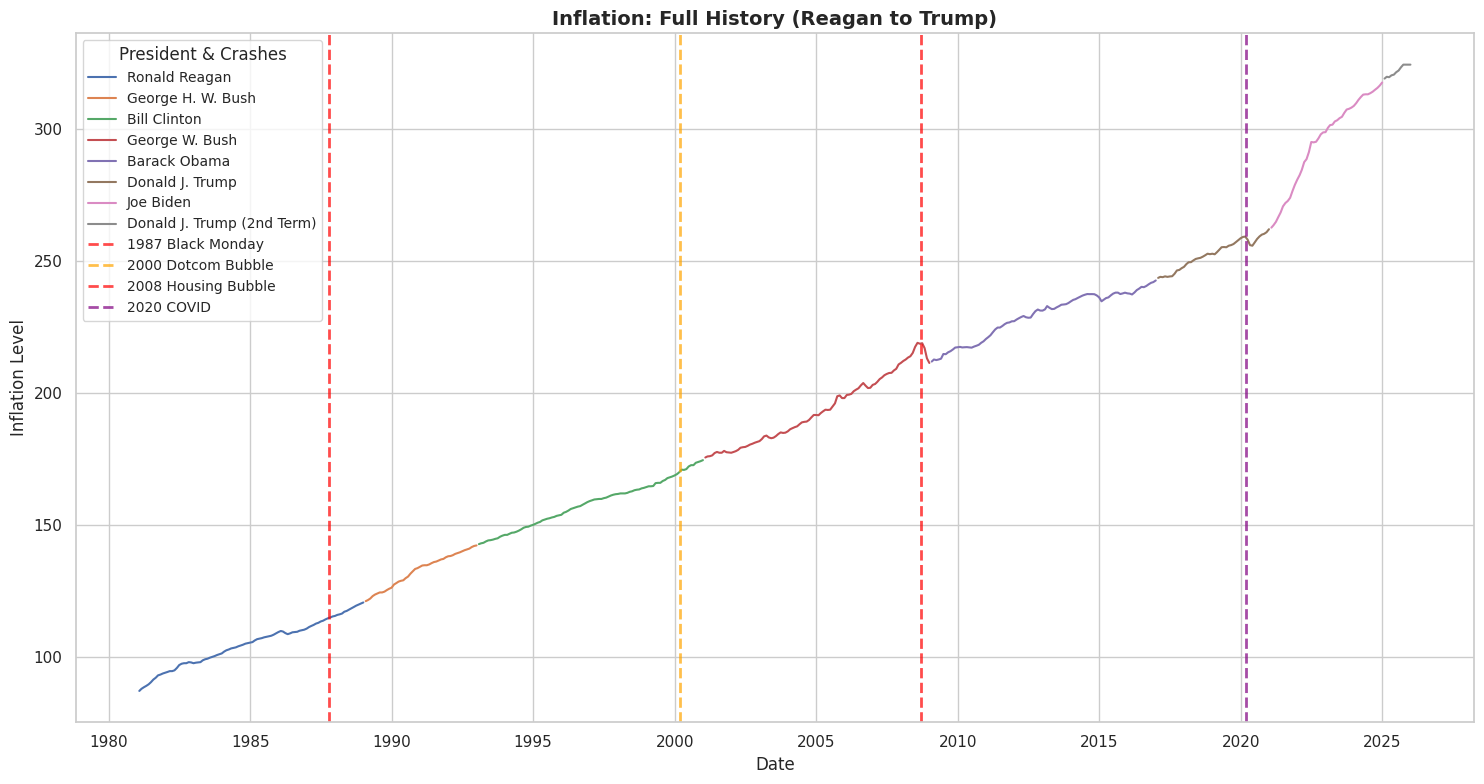

In [38]:
# 1. Inflation
overall_trend(final_merged_v2, 'observation_date', 'Inflation', 'Inflation: Full History (Reagan to Trump)', 'Date', 'Inflation Level') # unemployment rate



In [39]:
overall_trend_altair(
    final_merged_v2,
    'observation_date',
    'Inflation',
    'Inflation: Full History (Reagan to Trump)',
    'Date',
    'Inflation Level'
)  # unemployment rate


alt.LayerChart(...)

### 6.1.2 Interest Rate Overall

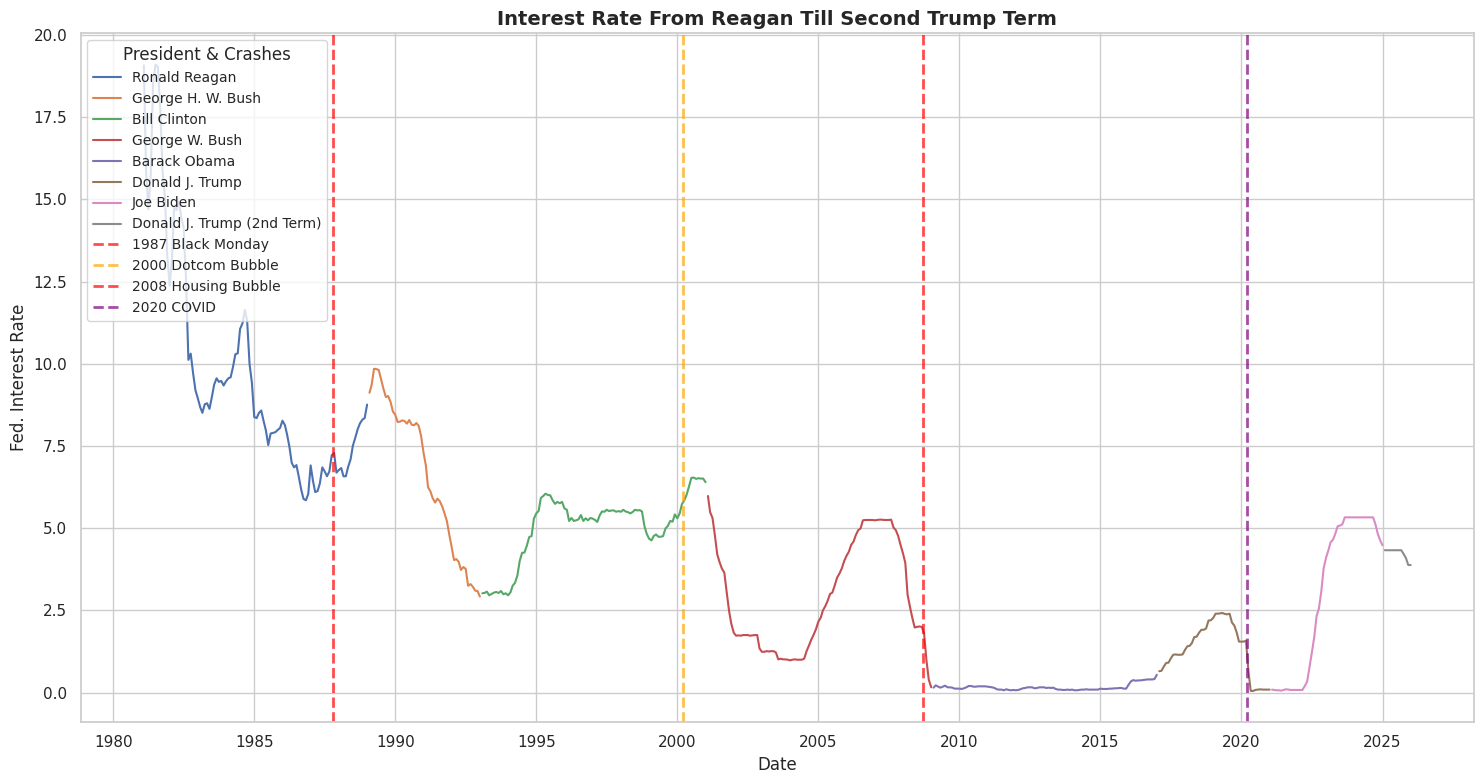

In [40]:
# 2. Interest Rate
overall_trend(final_merged_v2, 'observation_date', 'Interest Rate', 'Interest Rate From Reagan Till Second Trump Term',  'Date', 'Fed. Interest Rate') # unemployment rate


In [41]:
# 2. Interest Rate
overall_trend_altair(final_merged_v2, 'observation_date', 'Interest Rate', 'Interest Rate From Reagan Till Second Trump Term',  'Date', 'Fed. Interest Rate') # unemployment rate


alt.LayerChart(...)

### 6.1.3 Market Volatility

In [42]:
final_merged_v2.columns.tolist()

['Inflation',
 'Interest Rate',
 'Market Volatility',
 'Unemployment Rate',
 'President']

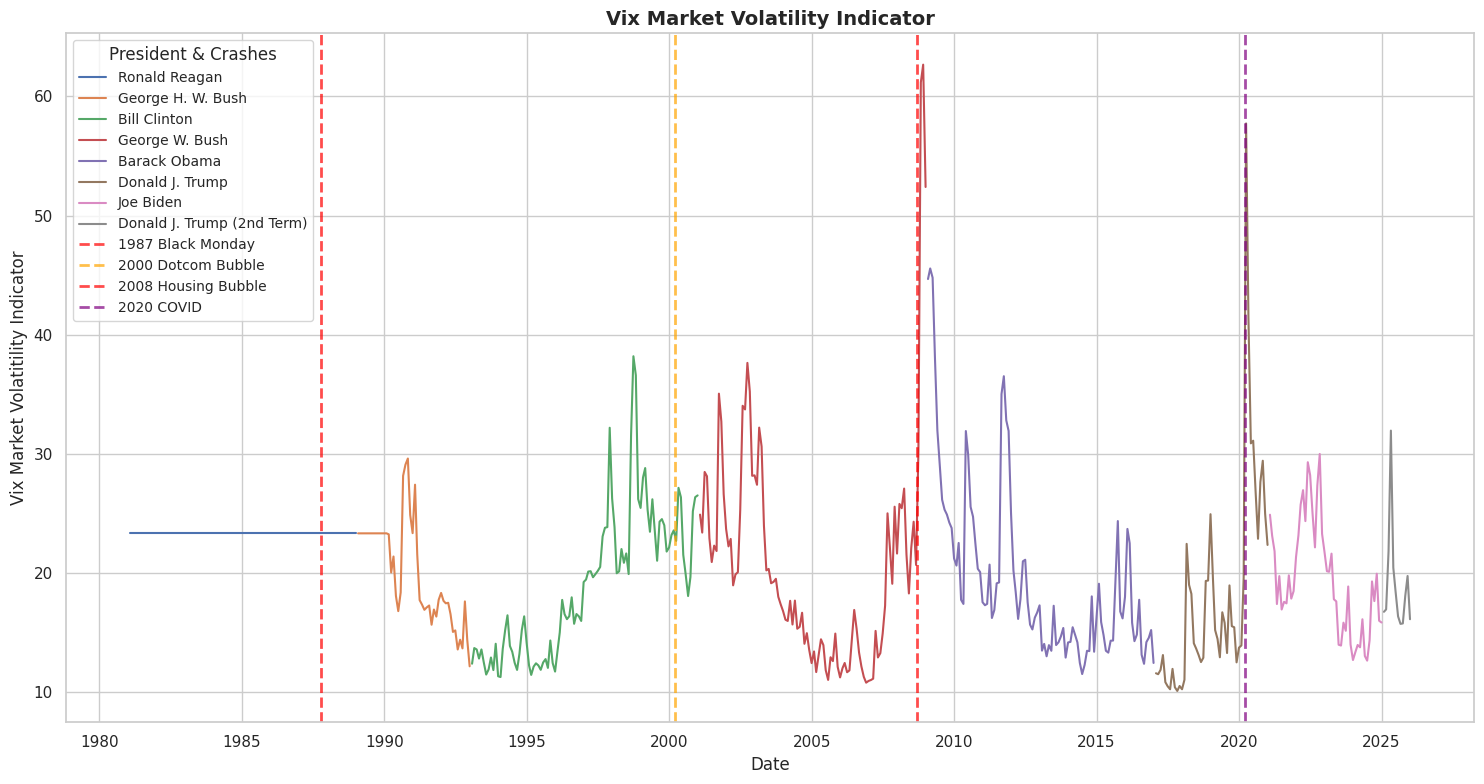

In [43]:
# 3. Vix Market Volatility Indicator
overall_trend(final_merged_v2, 'observation_date', 'Market Volatility', 'Vix Market Volatility Indicator',  'Date', 'Vix Market Volatitility Indicator') # unemployment rate

### 6.1.4 Unemployment Rate

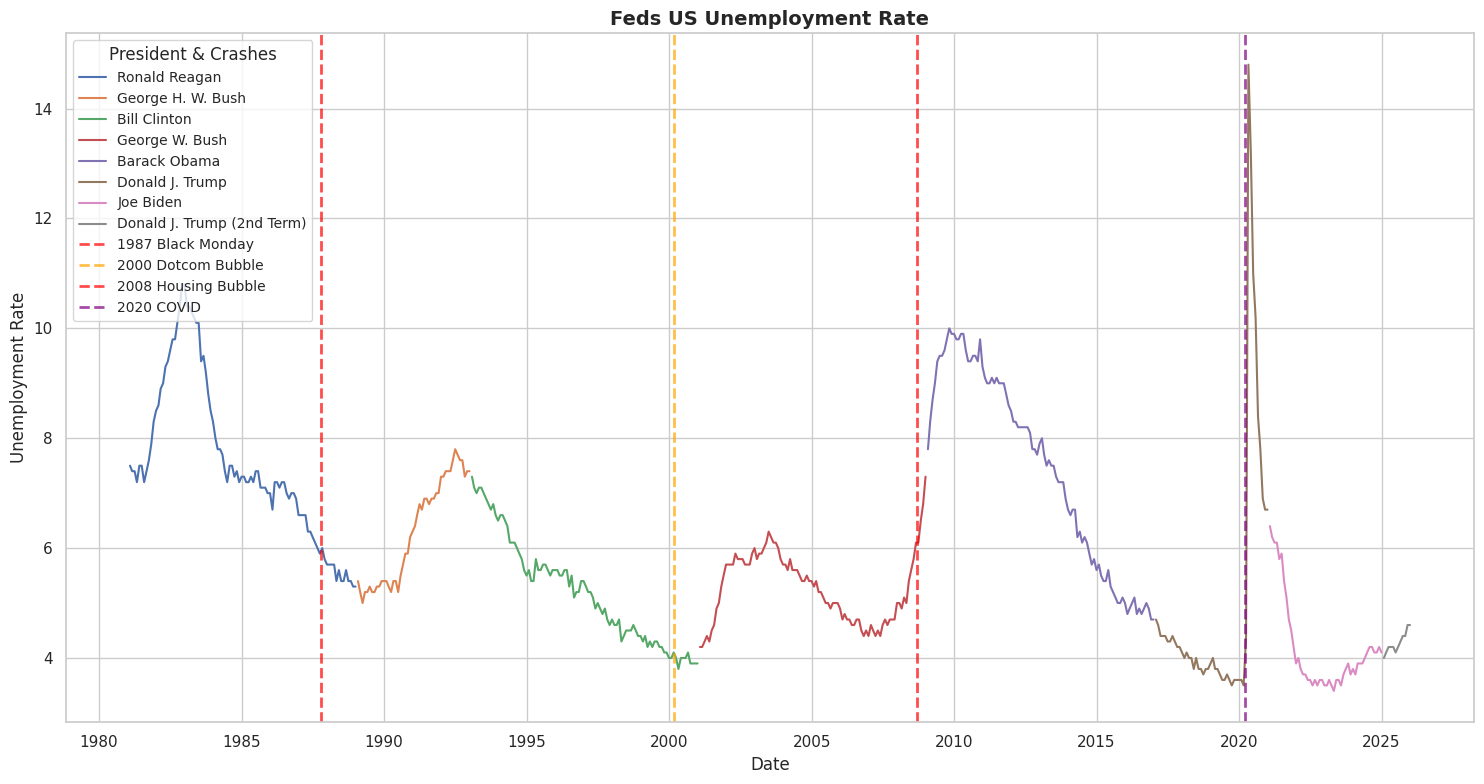

In [44]:
# Unemployment Rate
overall_trend(final_merged_v2, 'observation_date', 'Unemployment Rate', 'Feds US Unemployment Rate',  'Date', 'Unemployment Rate') # unemployment rate

In [45]:
# Unemployment Rate
overall_trend_altair(final_merged_v2, 'observation_date', 'Unemployment Rate', 'Feds US Unemployment Rate',  'Date', 'Unemployment Rate') # unemployment rate

alt.LayerChart(...)

### 6.1.5 All Indicators in one Picture

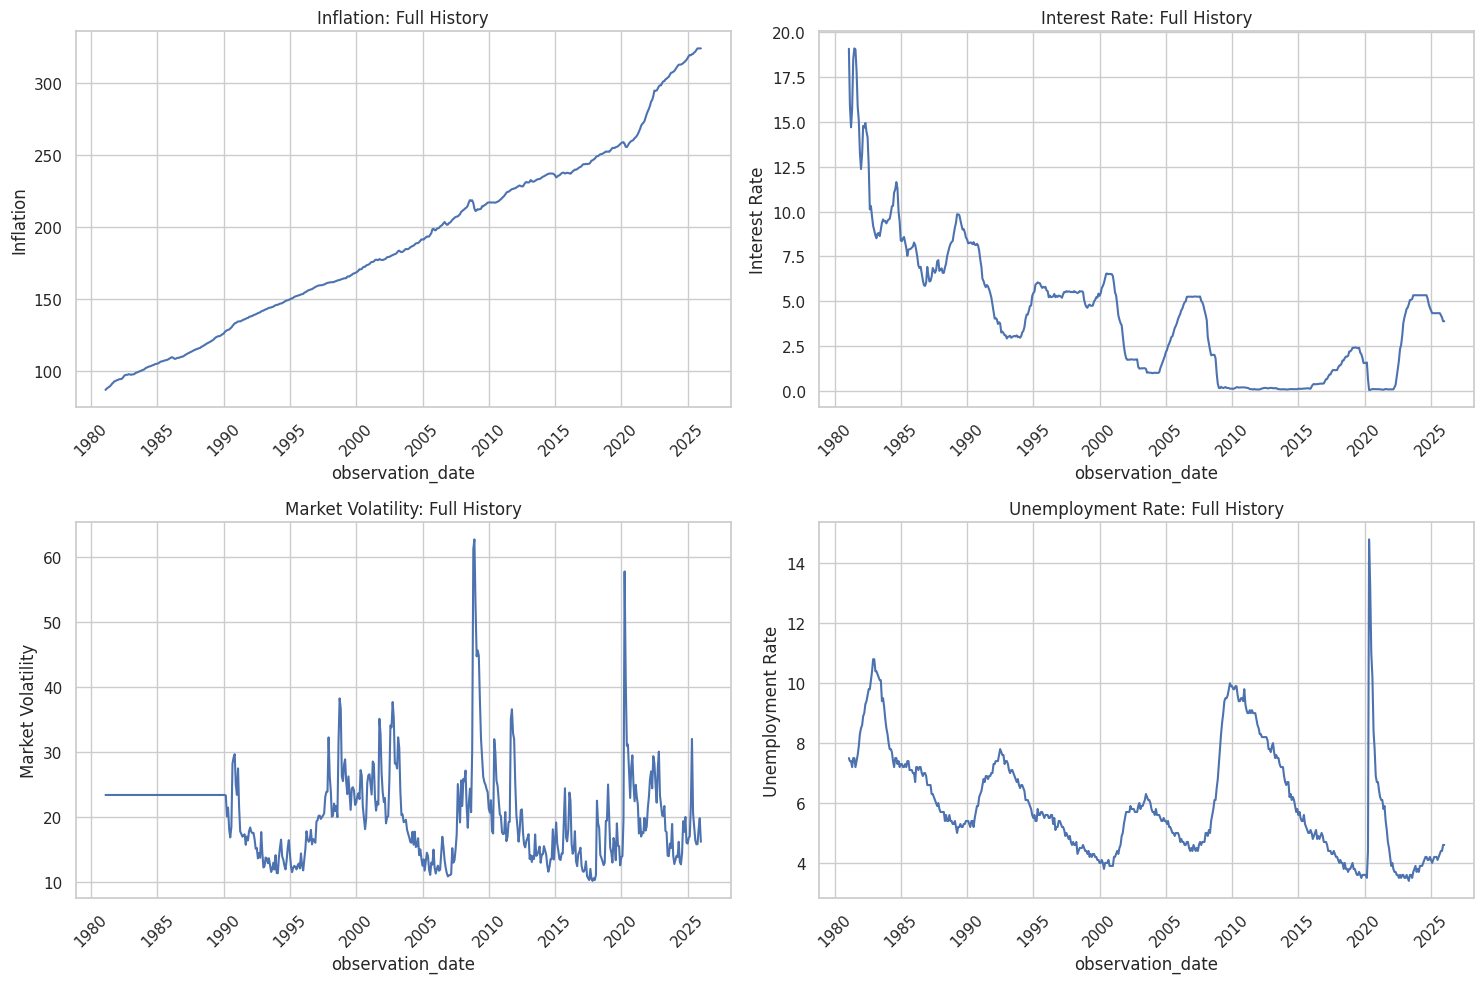

In [46]:
indicators = ['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, indicator in enumerate(indicators):
    sns.lineplot(data=final_merged_v2, x='observation_date', y=indicator, ax=axes[i])
    axes[i].set_title(f'{indicator}: Full History')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 7. One President only


In [47]:
def one_president_per_indicator(us_president, data, x_data, y_data, title, xlabel, ylabel):
  sns.set_theme(style='whitegrid')
  plt.figure(figsize=(10, 5))
  sns.lineplot(data=data[data['President'] == us_president], x=x_data,y=y_data)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


Single President Data


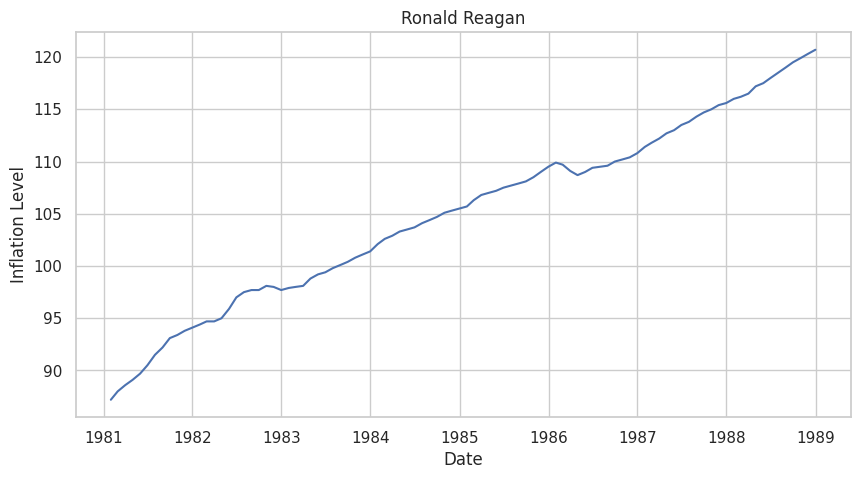

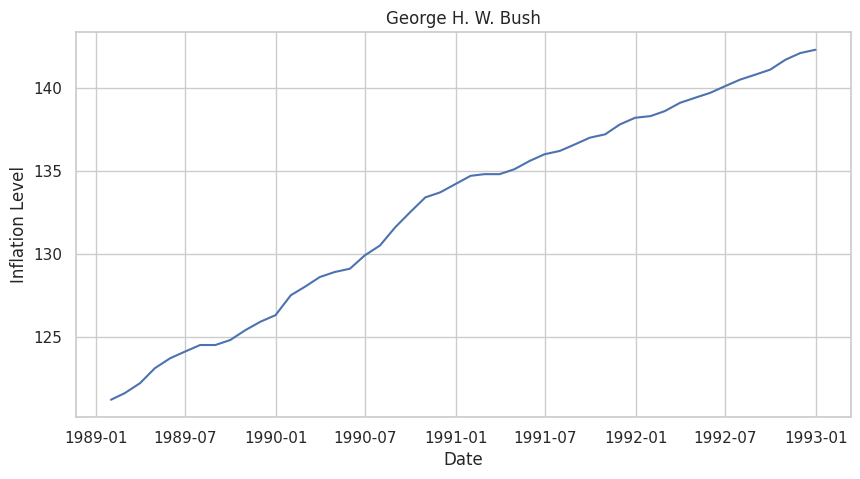

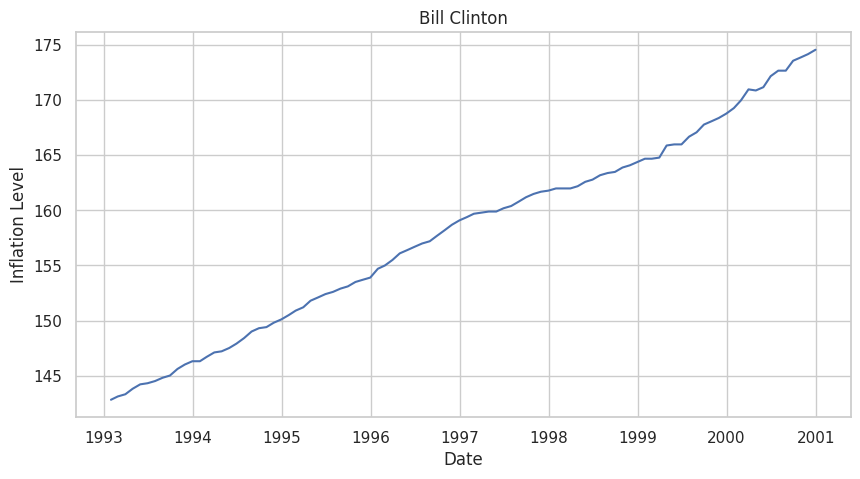

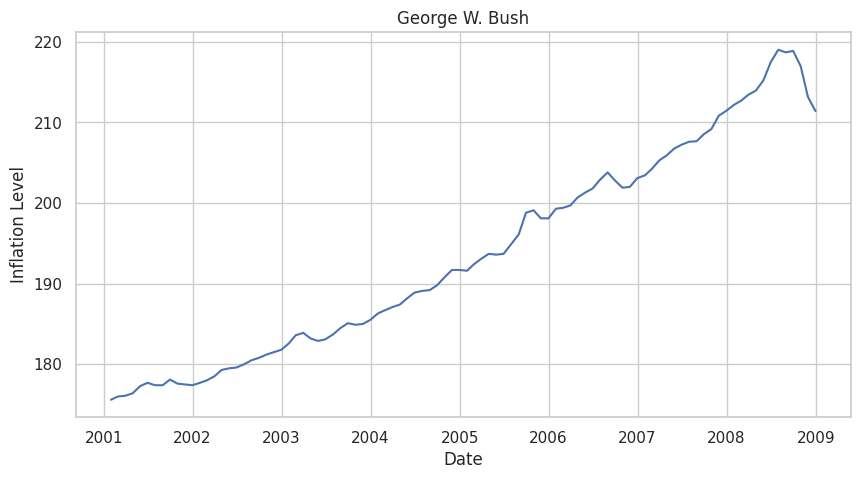

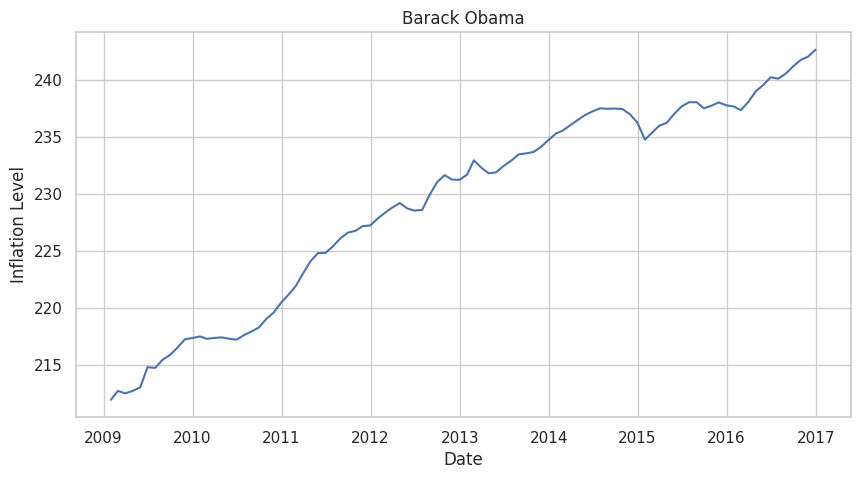

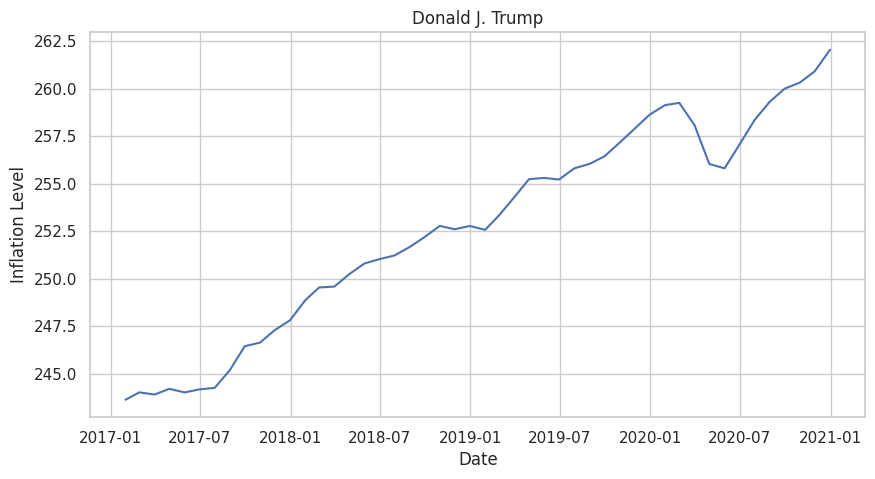

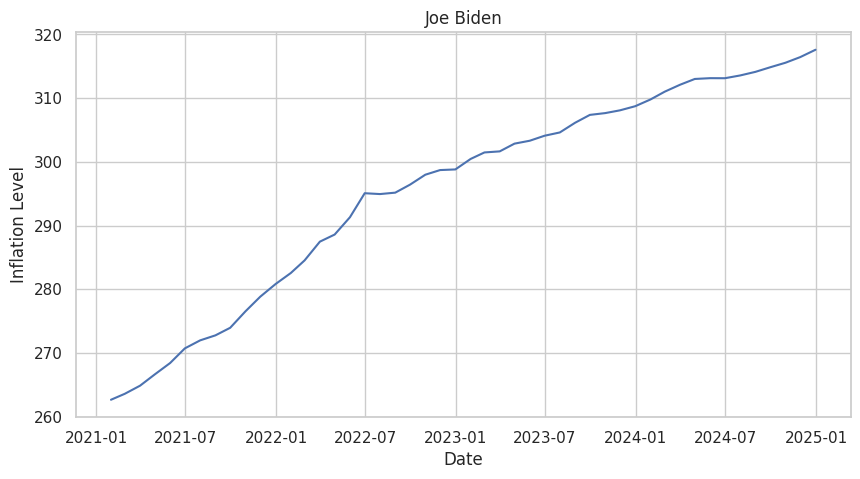

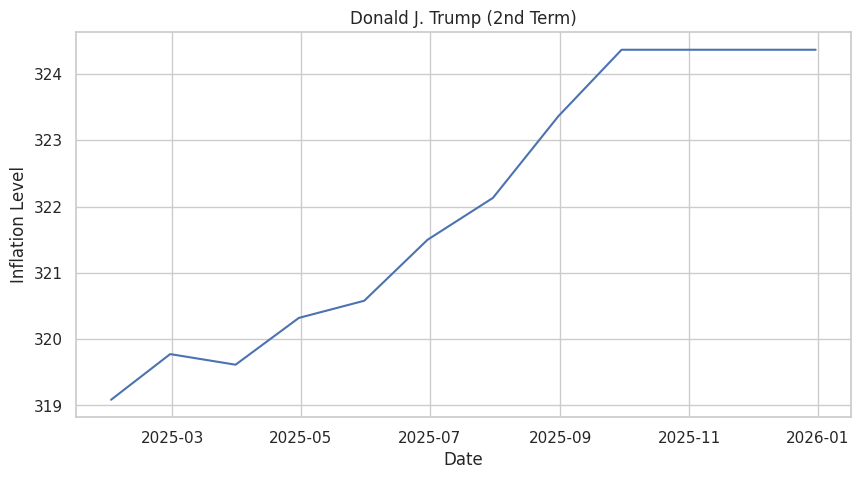

In [48]:
presidents = final_merged_v2['President'].unique()

print("Single President Data")

for president in presidents:
  one_president_per_indicator(president, final_merged_v2, 'observation_date', 'Inflation', president, 'Date', 'Inflation Level')

Average Inflation by President:
                              mean    std
President                                
Barack Obama                229.23   8.85
Bill Clinton                158.03   8.92
Donald J. Trump             252.68   5.45
Donald J. Trump (2nd Term)  321.99   2.10
George H. W. Bush           132.77   6.42
George W. Bush              193.66  12.95
Joe Biden                   295.50  16.75
Ronald Reagan               105.02   8.67


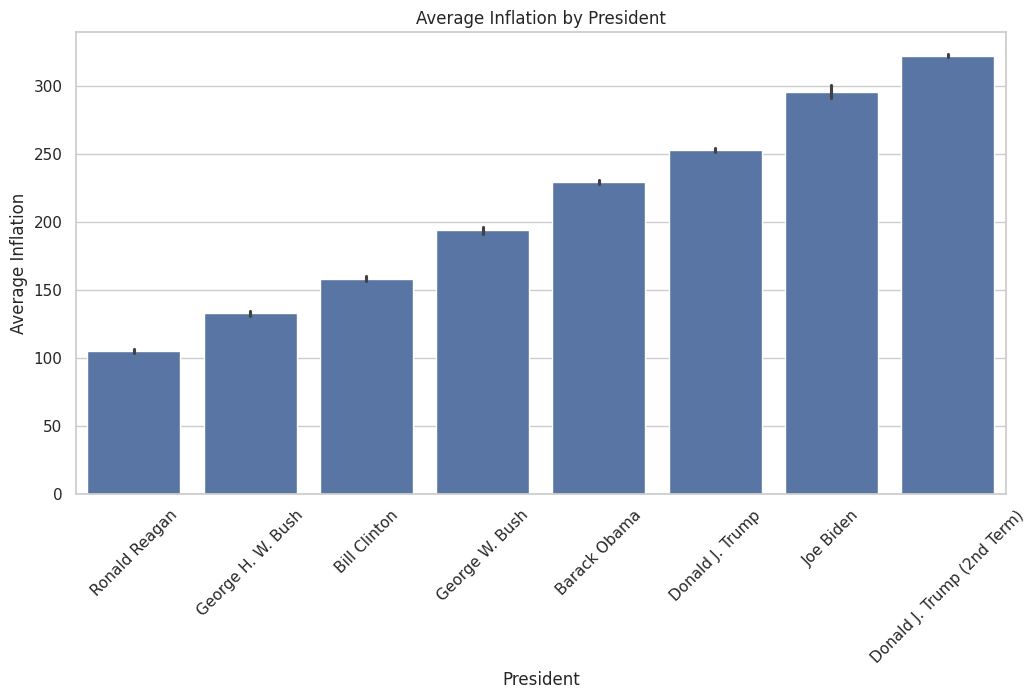

In [49]:
# Summary table first
summary = final_merged_v2.groupby('President')['Inflation'].agg(['mean', 'std']).round(2)
print("Average Inflation by President:")
print(summary)

# Bar chart comparing presidents
plt.figure(figsize=(12, 6))
sns.barplot(data=final_merged_v2, x='President', y='Inflation')
plt.title('Average Inflation by President')
plt.xticks(rotation=45)
plt.ylabel('Average Inflation')
plt.show()


In [50]:
final_merged_v2.columns

Index(['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate',
       'President'],
      dtype='object')

In [51]:
summary_all = final_merged_v2.groupby('President')[['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate']].agg(['mean', 'std']).round(2)
print("ALL INDICATORS by President:")
print(summary_all)

ALL INDICATORS by President:
                           Inflation        Interest Rate        \
                                mean    std          mean   std   
President                                                         
Barack Obama                  229.23   8.85          0.16  0.10   
Bill Clinton                  158.03   8.92          5.05  1.01   
Donald J. Trump               252.68   5.45          1.34  0.80   
Donald J. Trump (2nd Term)    321.99   2.10          4.23  0.18   
George H. W. Bush             132.77   6.42          6.63  2.27   
George W. Bush                193.66  12.95          2.89  1.64   
Joe Biden                     295.50  16.75          2.98  2.32   
Ronald Reagan                 105.02   8.67          9.64  3.35   

                           Market Volatility       Unemployment Rate        
                                        mean   std              mean   std  
President                                                                   
Ba

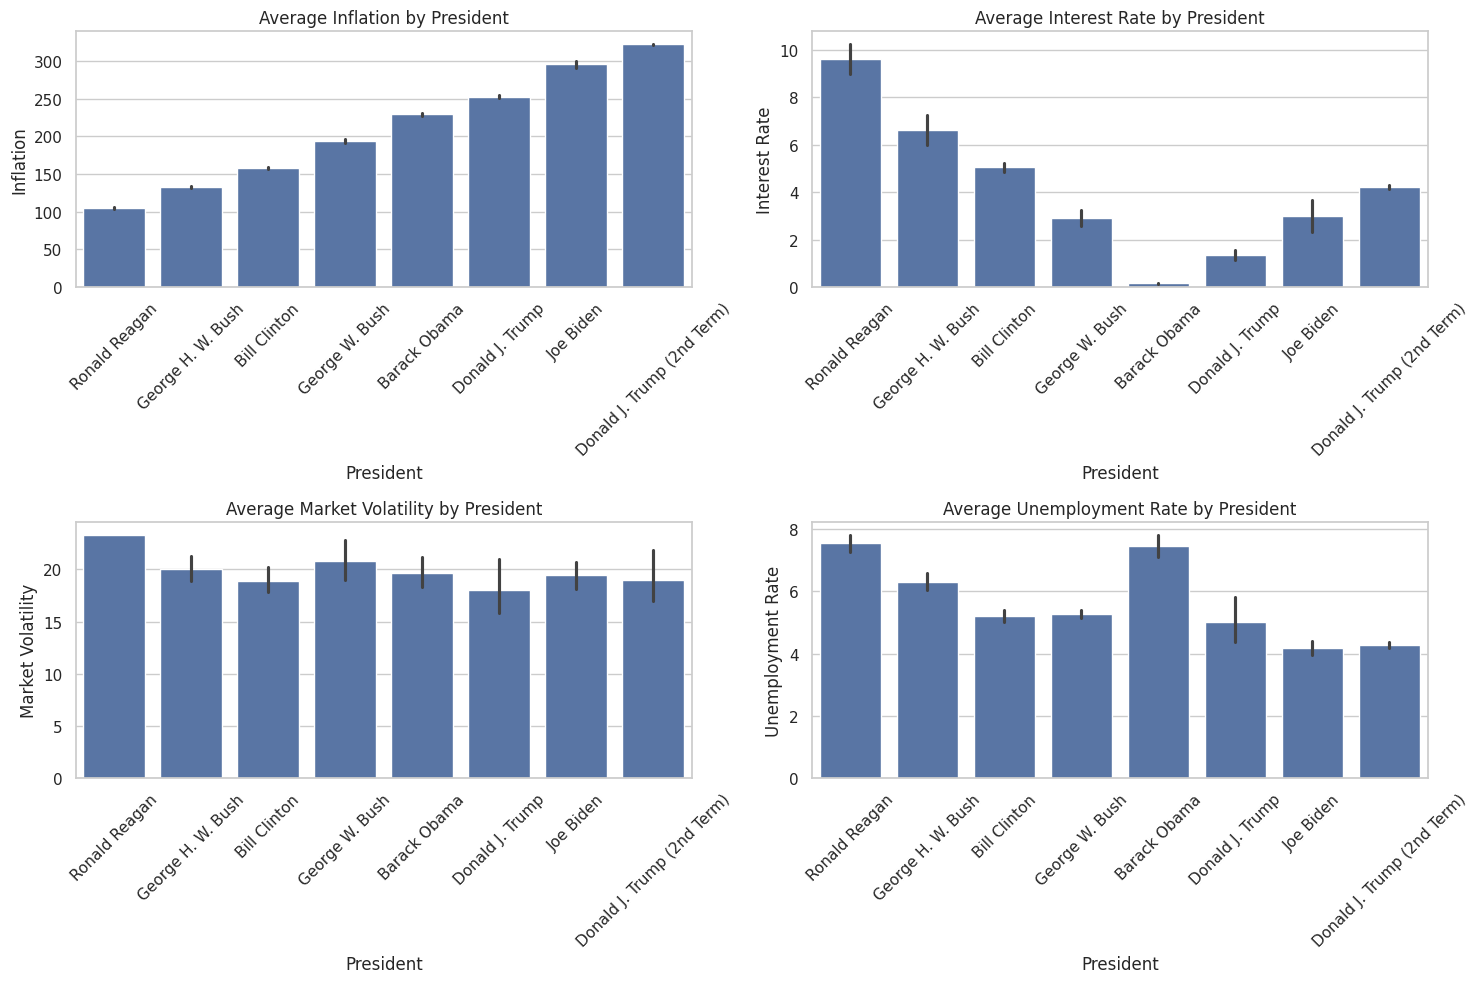

In [52]:
# Bar charts for ALL indicators (2x2 grid)
indicators = ['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, indicator in enumerate(indicators):
    sns.barplot(data=final_merged_v2, x='President', y=indicator, ax=axes[i])
    axes[i].set_title(f'Average {indicator} by President')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 8. Statistical Analysis


In [53]:
def statistics_per_president(type_of_statistic):
  return final_merged_v2.groupby('President')[indicators].agg(type_of_statistic).round(2)

In [54]:
means = statistics_per_president('mean')
print(means)

                            Inflation  Interest Rate  Market Volatility  \
President                                                                 
Barack Obama                   229.23           0.16              19.63   
Bill Clinton                   158.03           5.05              18.91   
Donald J. Trump                252.68           1.34              18.07   
Donald J. Trump (2nd Term)     321.99           4.23              19.03   
George H. W. Bush              132.77           6.63              20.06   
George W. Bush                 193.66           2.89              20.80   
Joe Biden                      295.50           2.98              19.42   
Ronald Reagan                  105.02           9.64              23.35   

                            Unemployment Rate  
President                                      
Barack Obama                             7.45  
Bill Clinton                             5.20  
Donald J. Trump                          5.01  
Donald J.

In [55]:
stds = statistics_per_president('std')
print(stds)

                            Inflation  Interest Rate  Market Volatility  \
President                                                                 
Barack Obama                     8.85           0.10               7.47   
Bill Clinton                     8.92           1.01               6.06   
Donald J. Trump                  5.45           0.80               9.03   
Donald J. Trump (2nd Term)       2.10           0.18               4.52   
George H. W. Bush                6.42           2.27               4.33   
George W. Bush                  12.95           1.64               9.63   
Joe Biden                       16.75           2.32               4.71   
Ronald Reagan                    8.67           3.35               0.00   

                            Unemployment Rate  
President                                      
Barack Obama                             1.76  
Bill Clinton                             0.96  
Donald J. Trump                          2.53  
Donald J.

In [56]:
maxs = statistics_per_president('max')
maxs

,Inflation,Interest Rate,Market Volatility,Unemployment Rate
President,,,,
Barack Obama,242.64,0.54,45.57,10.0
Bill Clinton,174.60,6.54,38.20,7.3
Donald J. Trump,262.04,2.42,57.74,14.8
Donald J. Trump (2nd Term),324.37,4.33,31.97,4.6
George H. W. Bush,142.30,9.85,29.63,7.8
George W. Bush,219.02,5.98,62.67,7.3
Joe Biden,317.60,5.33,30.01,6.4
Ronald Reagan,120.70,19.10,23.35,10.8


In [57]:
mins = statistics_per_president('min')
mins

,Inflation,Interest Rate,Market Volatility,Unemployment Rate
President,,,,
Barack Obama,211.93,0.07,11.54,4.7
Bill Clinton,142.80,2.96,11.29,3.8
Donald J. Trump,243.62,0.05,10.13,3.5
Donald J. Trump (2nd Term),319.09,3.88,15.75,4.0
George H. W. Bush,121.20,2.92,12.19,5.0
George W. Bush,175.60,0.16,10.82,4.2
Joe Biden,262.64,0.06,12.67,3.4
Ronald Reagan,87.20,5.85,23.35,5.3


In [58]:
medians = statistics_per_president('median')
medians

,Inflation,Interest Rate,Market Volatility,Unemployment Rate
President,,,,
Barack Obama,231.66,0.14,17.31,7.75
Bill Clinton,159.25,5.31,18.67,5.20
Donald J. Trump,252.77,1.46,14.86,4.00
Donald J. Trump (2nd Term),321.82,4.33,17.53,4.20
George H. W. Bush,134.45,7.11,18.37,6.35
George W. Bush,191.70,2.38,19.05,5.30
Joe Biden,299.63,4.22,18.69,3.90
Ronald Reagan,105.60,8.54,23.35,7.25


In [59]:
statistics = ['mean', 'median', 'min', 'max', 'std']
all_statistics = statistics_per_president(statistics)
all_statistics

Inflation                                 \
                                mean  median     min     max    std   
President                                                             
Barack Obama                  229.23  231.66  211.93  242.64   8.85   
Bill Clinton                  158.03  159.25  142.80  174.60   8.92   
Donald J. Trump               252.68  252.77  243.62  262.04   5.45   
Donald J. Trump (2nd Term)    321.99  321.82  319.09  324.37   2.10   
George H. W. Bush             132.77  134.45  121.20  142.30   6.42   
George W. Bush                193.66  191.70  175.60  219.02  12.95   
Joe Biden                     295.50  299.63  262.64  317.60  16.75   
Ronald Reagan                 105.02  105.60   87.20  120.70   8.67   

                           Interest Rate                            \
                                    mean median   min    max   std   
President                                                            
Barack Obama                        0.16   0.14  0.07   0.54  0.10   
Bill Clinton                        5.05   5.31  2.96   6.54  1.01   
Donald J. Trump                     1.34   1.46  0.05   2.42  0.80   
Donald J. Trump (2nd Term)          4.23   4.33  3.88   4.33  0.18   
George H. W. Bush                   6.63   7.11  2.92   9.85  2.27   
George W. Bush                      2.89   2.38  0.16   5.98  1.64   
Joe Biden                           2.98   4.22  0.06   5.33  2.32   
Ronald Reagan                       9.64   8.54  5.85  19.10  3.35   

                           Market Volatility                             \
                                        mean median    min    max   std   
President                                                                 
Barack Obama                           19.63  17.31  11.54  45.57  7.47   
Bill Clinton                           18.91  18.67  11.29  38.20  6.06   
Donald J. Trump                        18.07  14.86  10.13  57.74  9.03   
Donald J. Trump (2nd Term)             19.03  17.53  15.75  31.97  4.52   
George H. W. Bush                      20.06  18.37  12.19  29.63  4.33   
George W. Bush                         20.80  19.05  10.82  62.67  9.63   
Joe Biden                              19.42  18.69  12.67  30.01  4.71   
Ronald Reagan                          23.35  23.35  23.35  23.35  0.00   

                           Unemployment Rate                          
                                        mean median  min   max   std  
President                                                             
Barack Obama                            7.45   7.75  4.7  10.0  1.76  
Bill Clinton                            5.20   5.20  3.8   7.3  0.96  
Donald J. Trump                         5.01   4.00  3.5  14.8  2.53  
Donald J. Trump (2nd Term)              4.27   4.20  4.0   4.6  0.19  
George H. W. Bush                       6.30   6.35  5.0   7.8  0.94  
George W. Bush                          5.27   5.30  4.2   7.3  0.64  
Joe Biden                               4.17   3.90  3.4   6.4  0.84  
Ronald Reagan                           7.54   7.25  5.3  10.8  1.46

In [60]:
means.name = 'Mean'
maxs.name = 'Max'
mins.name = "Min"
medians.name = "Median"
stds.name = "Std"

statistics_dict = {
    'Mean': 'Means by President',
    'Std': 'Standard Deviation by President',
    'Median': 'Medians by President',
    'Max': 'Maximums by President',
    'Min': 'Minimums by President'
}

array_of_calculations = [means, maxs, mins, medians, stds]

def plot_statistics(statistics_data):
    title = statistics_dict[statistics_data.name]
    statistics_data.plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Value')
    plt.show()

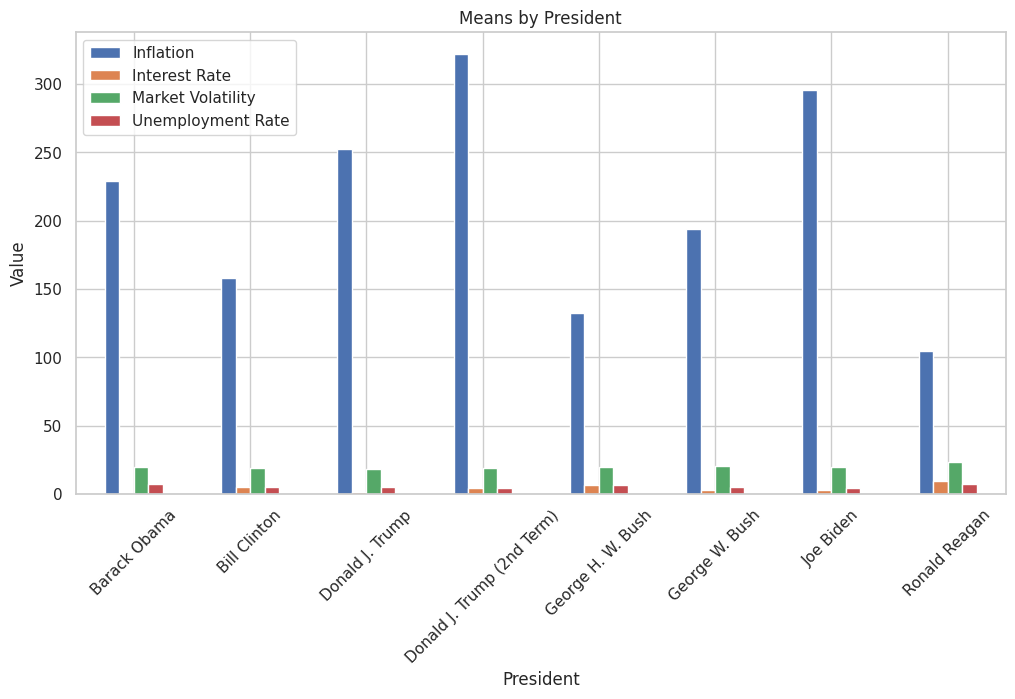

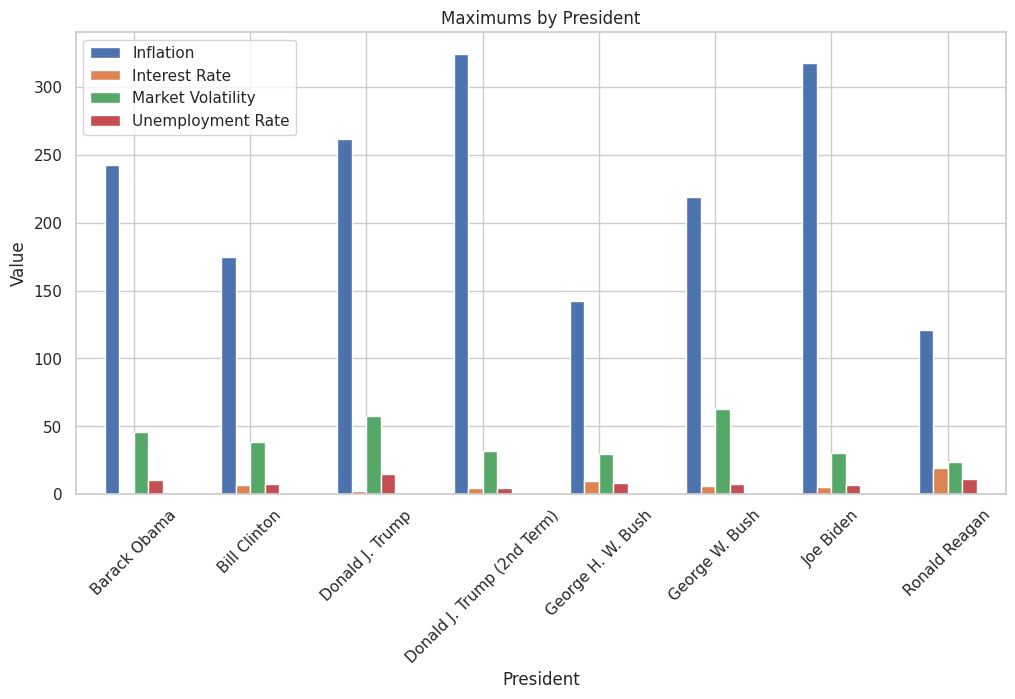

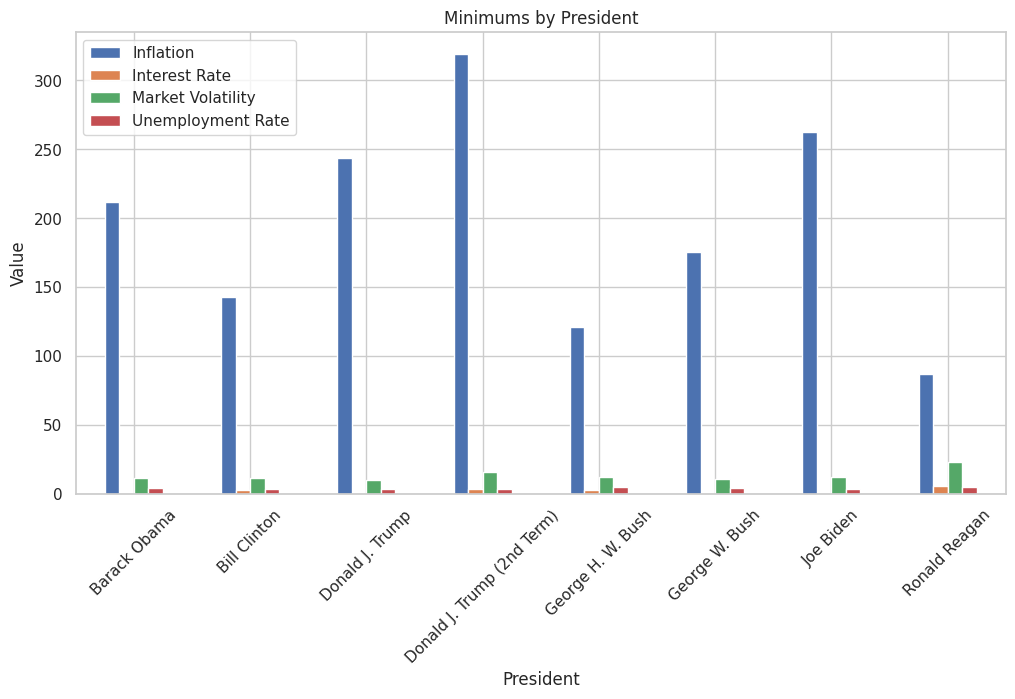

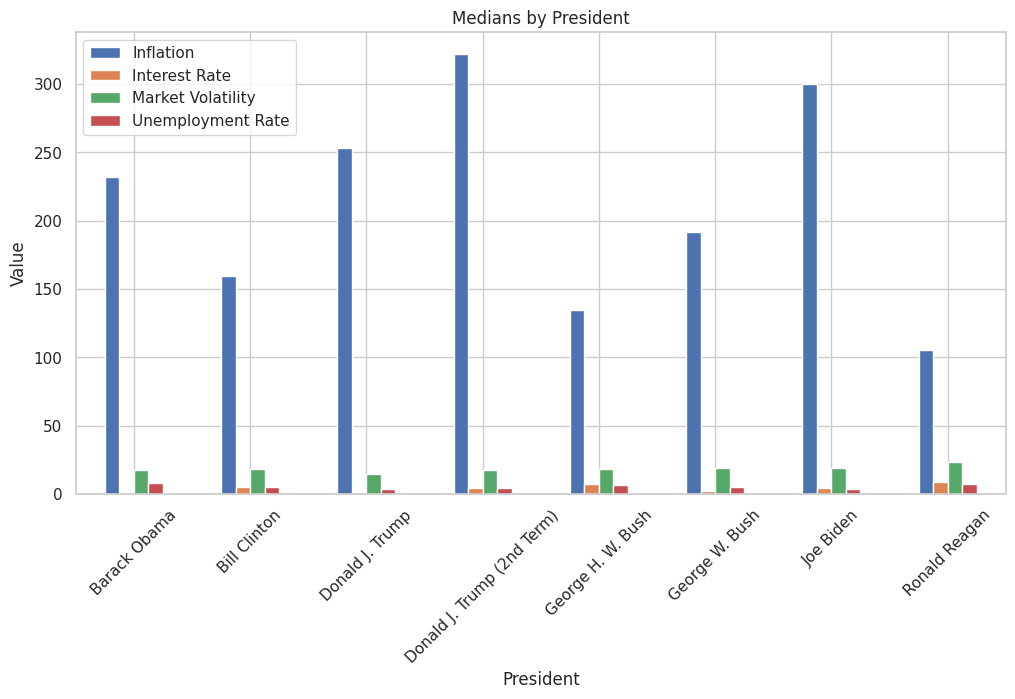

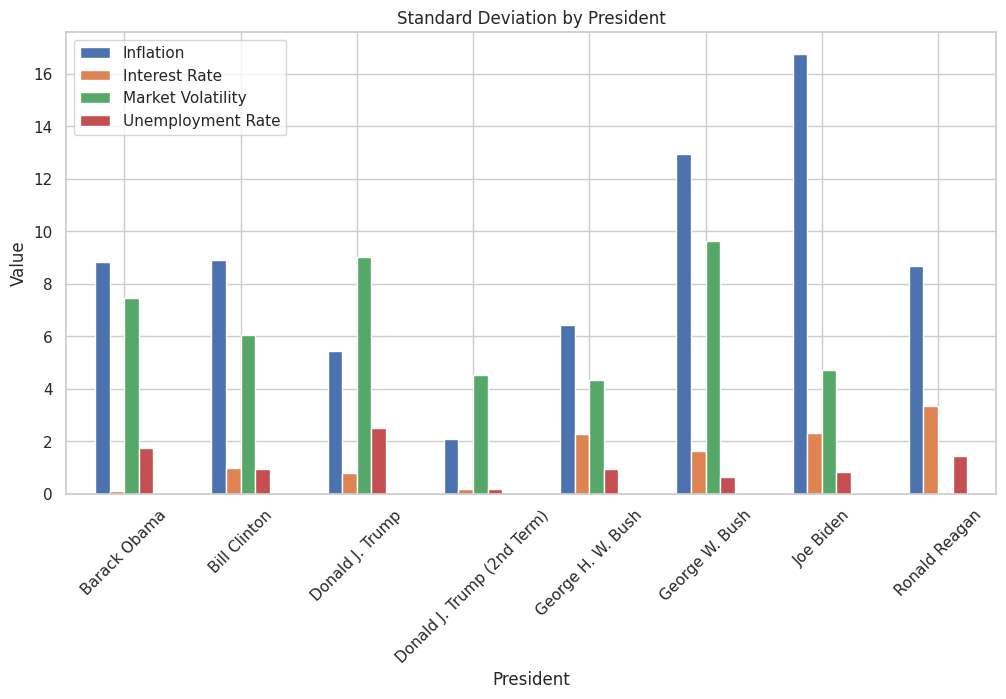

In [61]:
for calc in array_of_calculations:
  plot_statistics(calc)

## 9. Zooming in on each statistic indicator
mean

In [62]:
def plot_single_stat(indicator_name, type_of_statistic):
    data = statistics_per_president(type_of_statistic)[indicator_name]
    data.plot(kind='bar', figsize=(12,6))

    # MANUAL labels
    for i, v in enumerate(data):
        plt.text(i, v + 0.02*max(data), f'{v:.1f}', ha='center', va='bottom', fontsize=8)

    plt.title(f'{type_of_statistic} {indicator_name} by President')
    plt.xticks(rotation=90)
    plt.show()


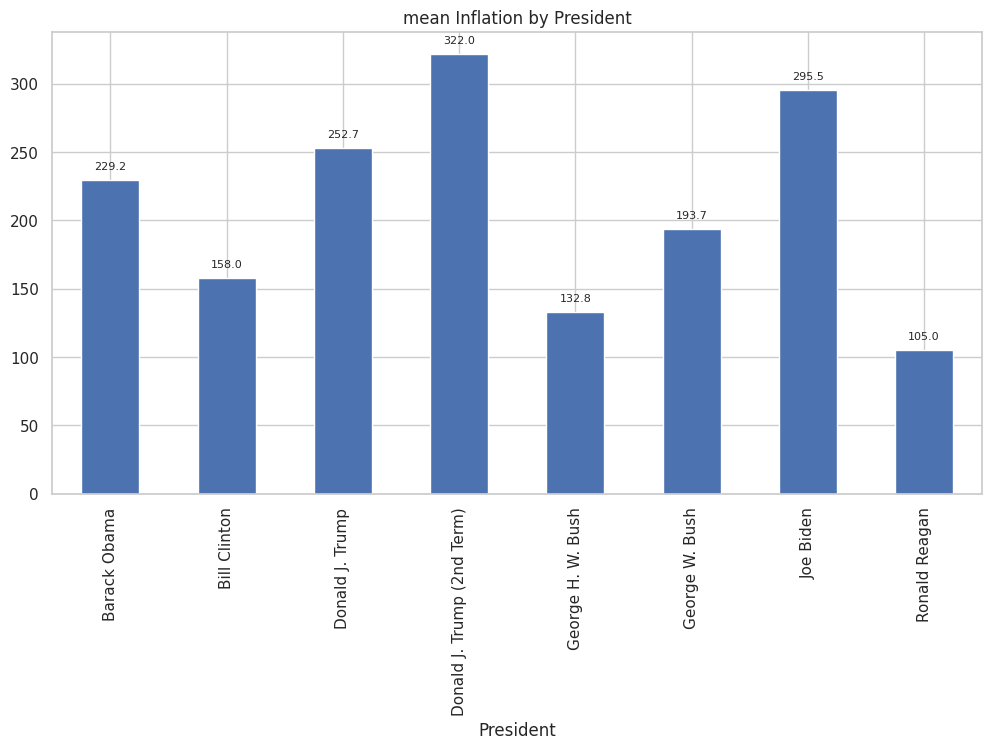

In [63]:
plot_single_stat('Inflation', 'mean')

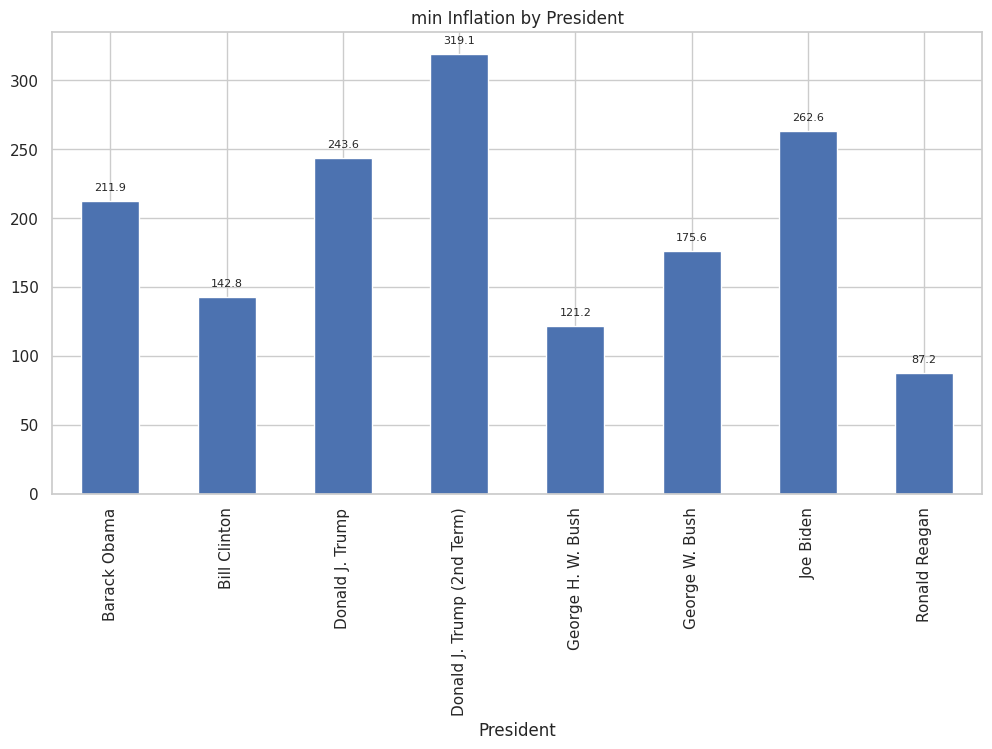

In [64]:
plot_single_stat('Inflation', 'min')

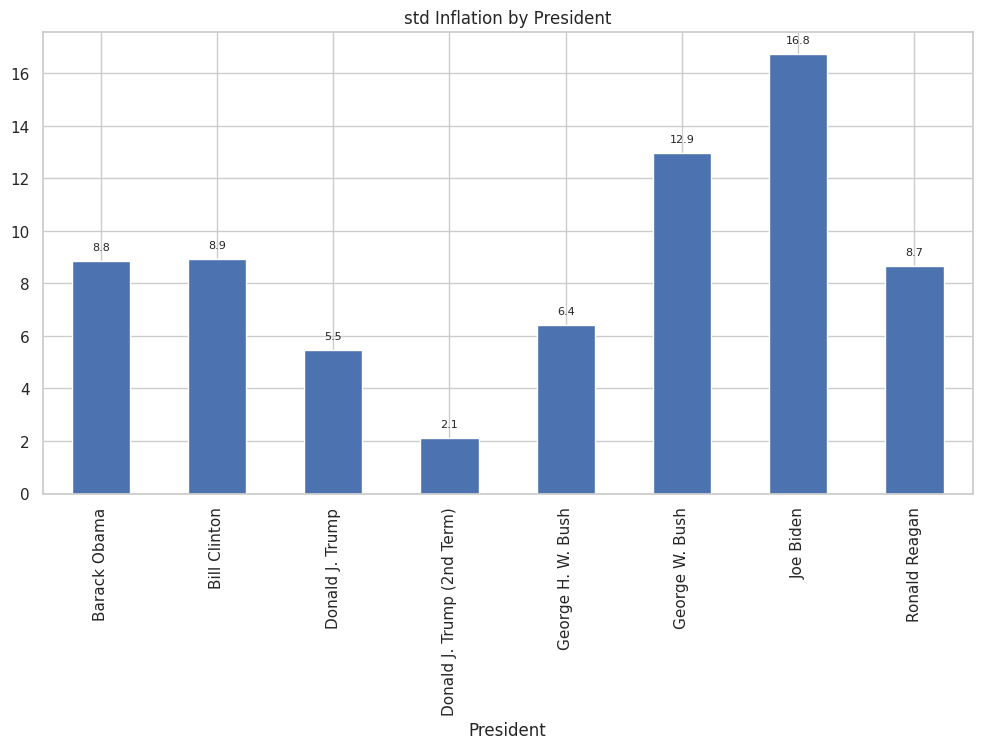

In [65]:
plot_single_stat('Inflation', 'std')

In [66]:
final_merged_v2.columns

Index(['Inflation', 'Interest Rate', 'Market Volatility', 'Unemployment Rate',
       'President'],
      dtype='object')

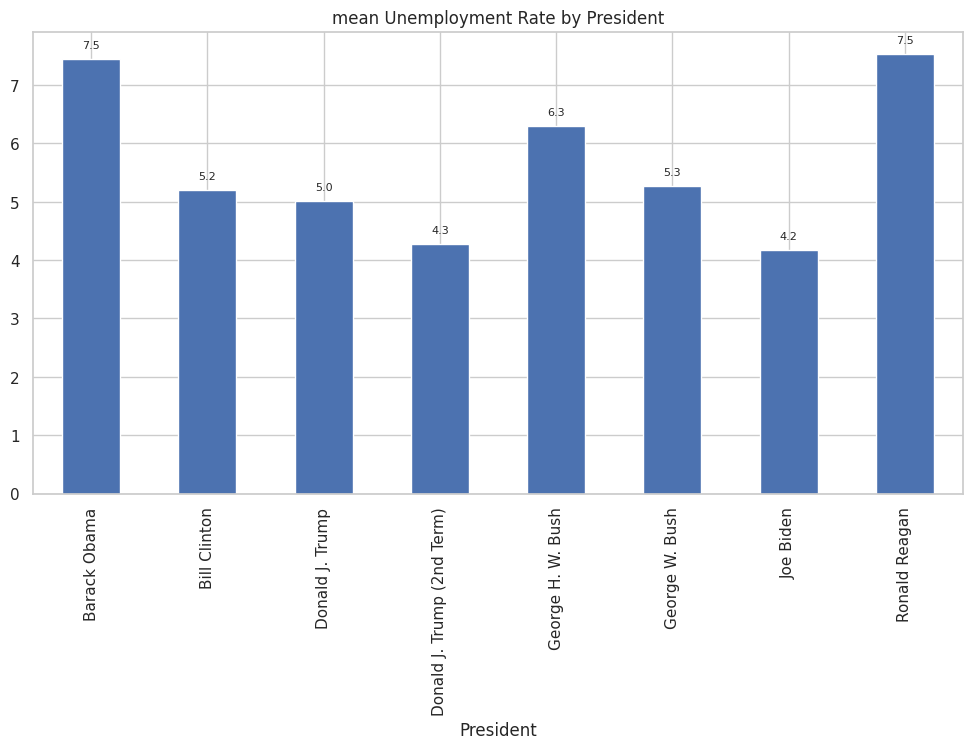

In [67]:
plot_single_stat('Unemployment Rate', 'mean')

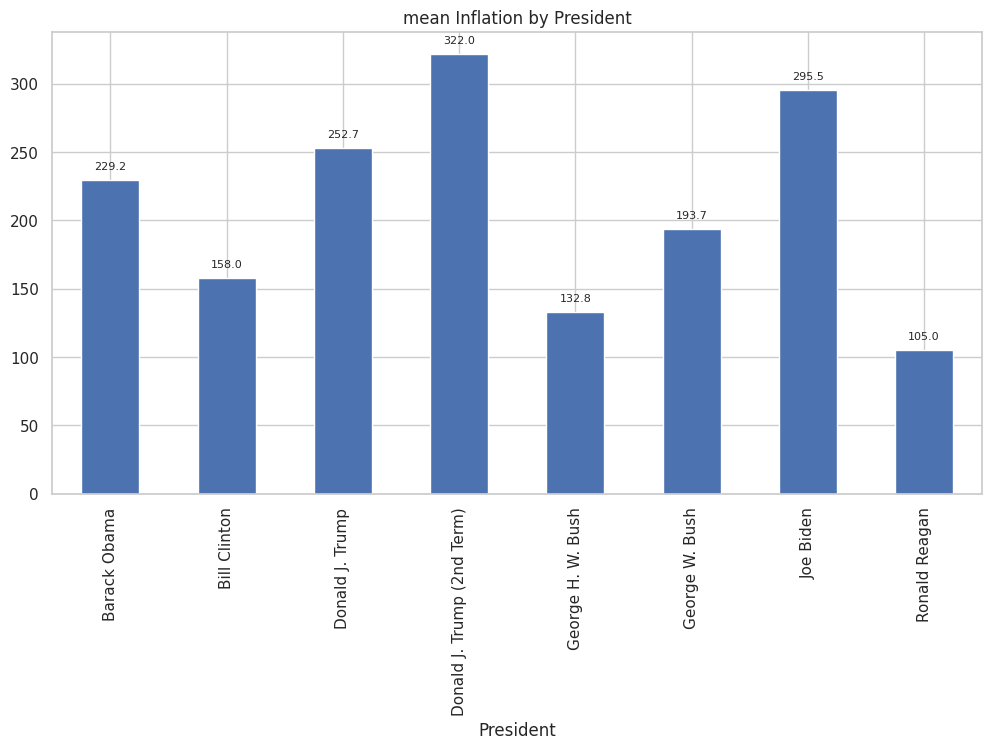

In [68]:
plot_single_stat('Inflation', 'mean')

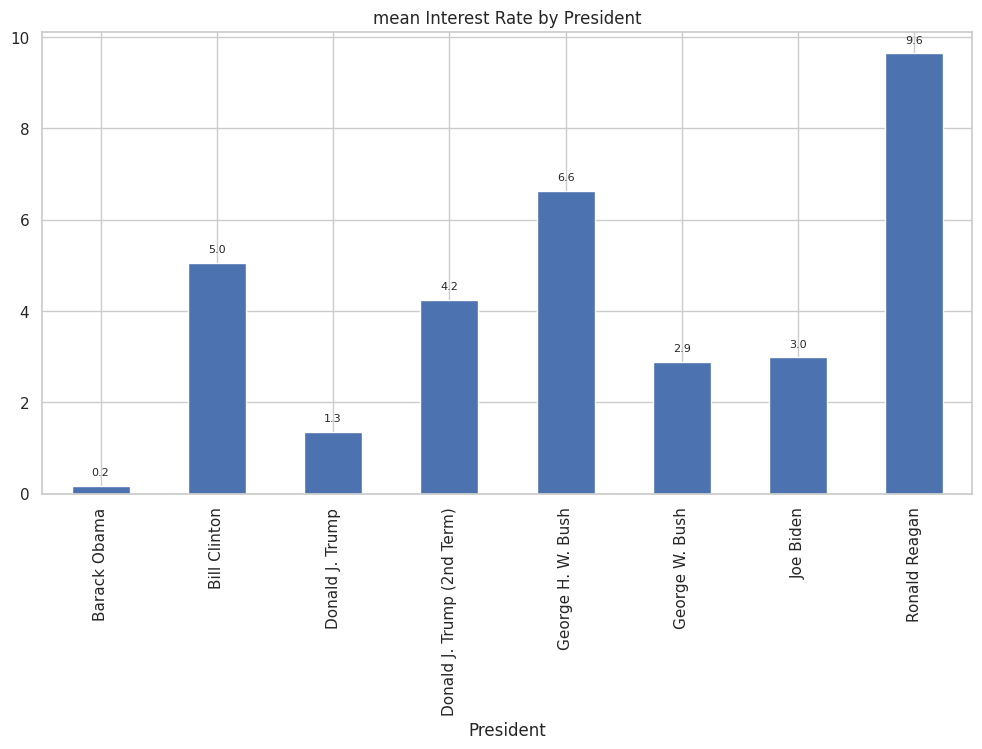

In [69]:
plot_single_stat('Interest Rate', 'mean')

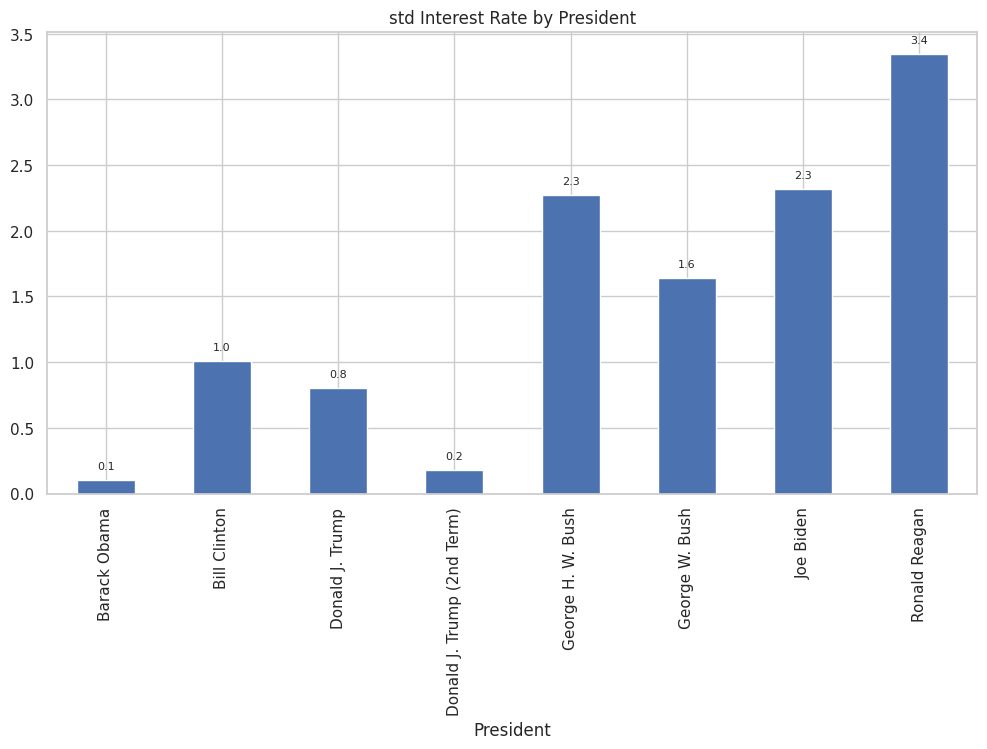

In [70]:
plot_single_stat('Interest Rate', 'std')

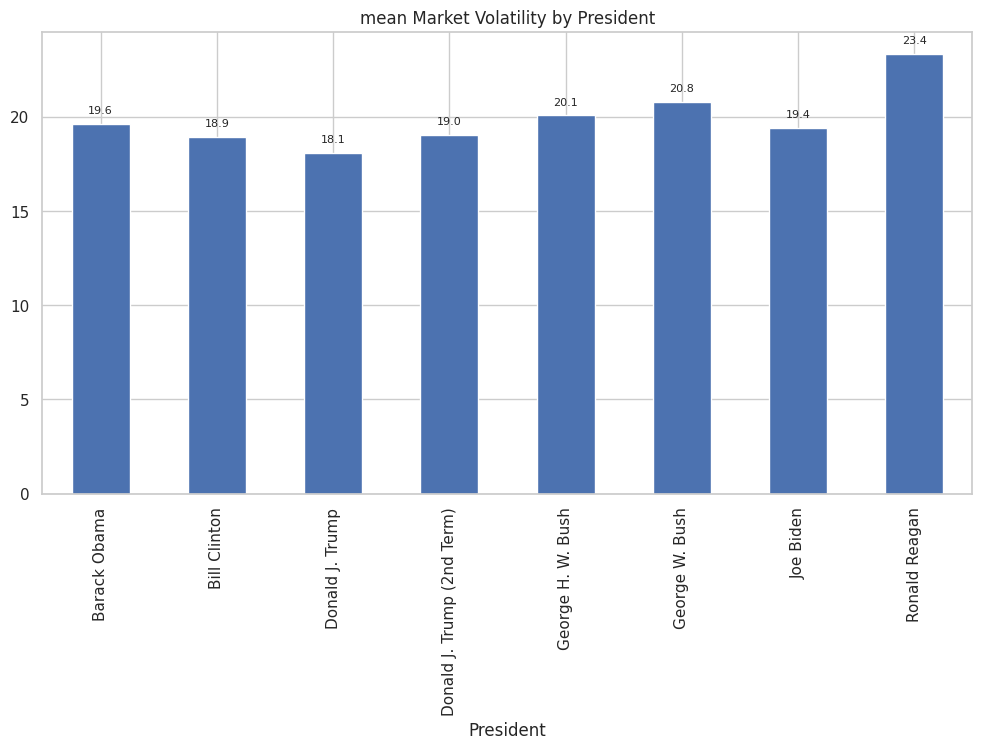

In [71]:
plot_single_stat('Market Volatility', 'mean')

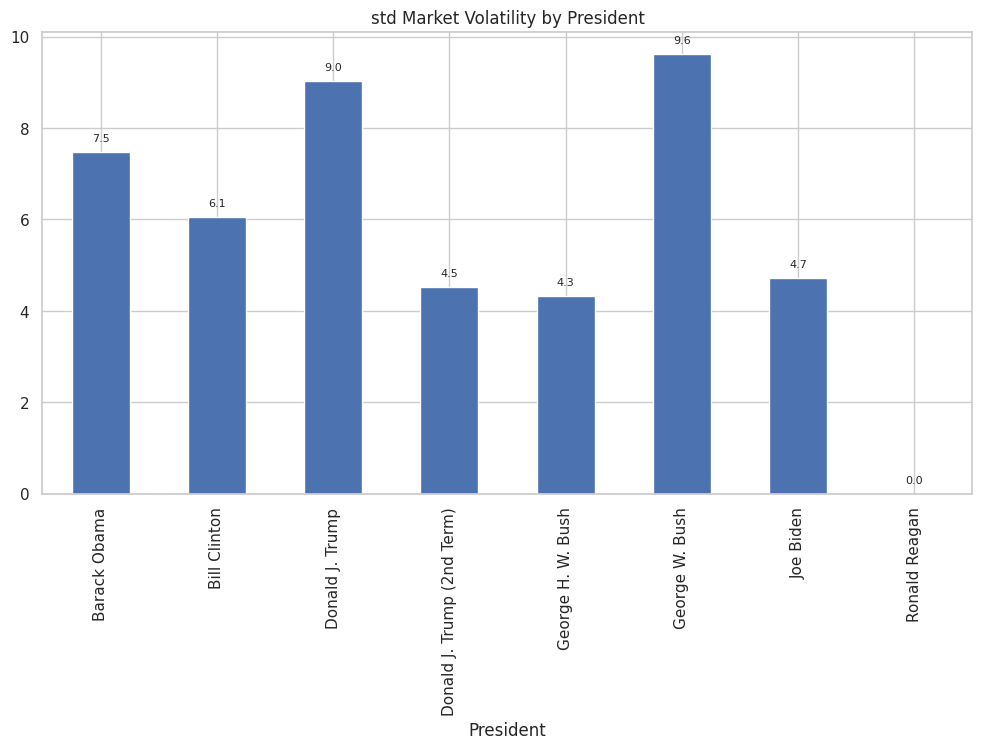

In [72]:
plot_single_stat('Market Volatility', 'std')

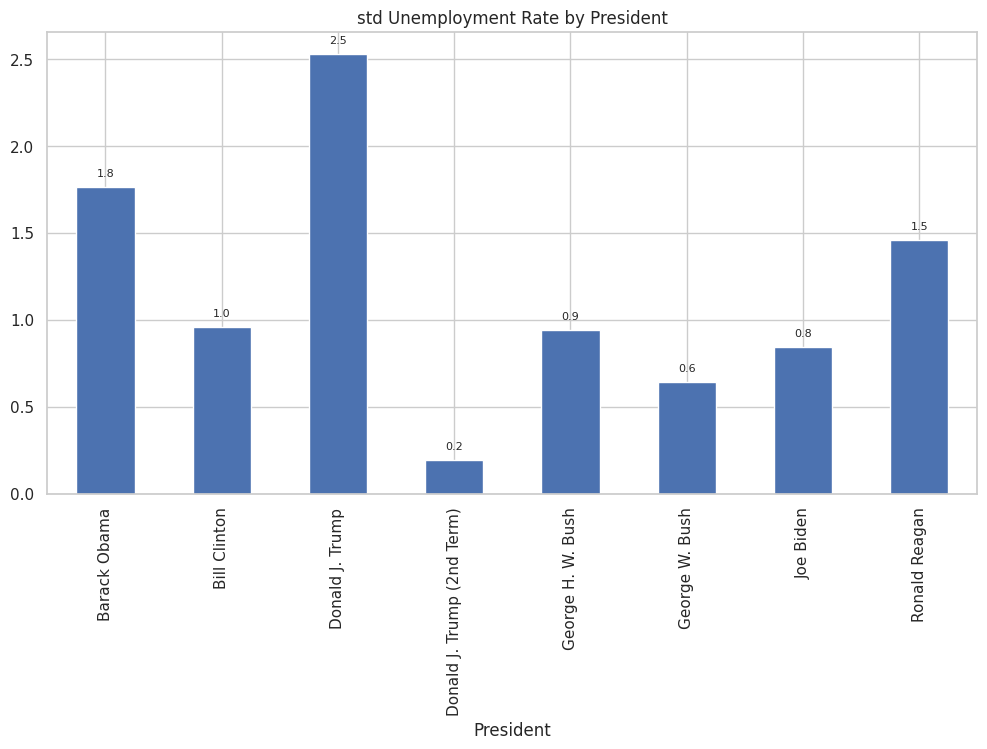

In [73]:
plot_single_stat('Unemployment Rate', 'std')

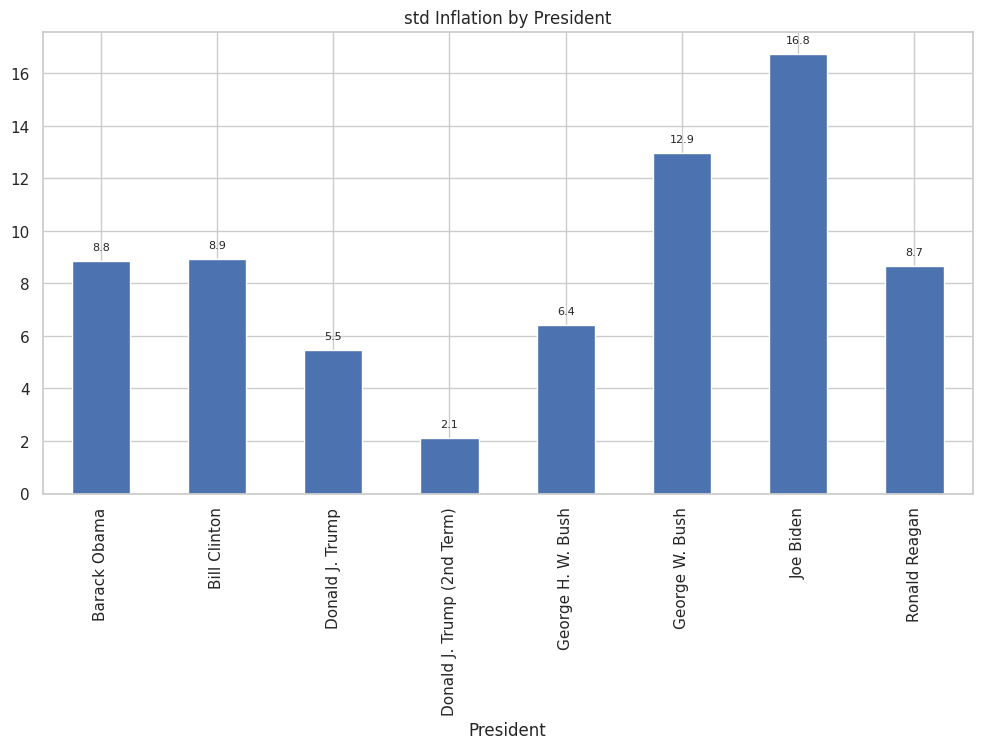

In [74]:
plot_single_stat('Inflation', 'std')

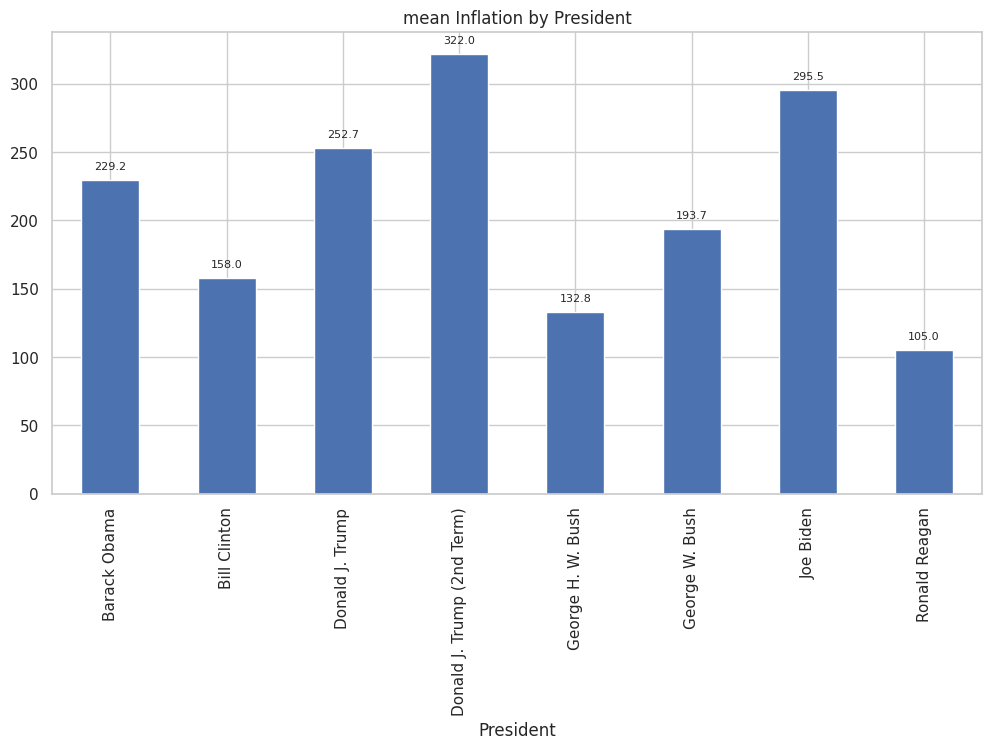

In [75]:
plot_single_stat('Inflation', 'mean')

## 10. Takeaways

### 1. Unemployment Rate
Since 1980, Ronald Reagan and Barack Obama experienced the highest average unemployment rates, at 7.45% and 7.54% respectively. During their presidencies, the U.S. also faced two major market crashes: the 1987 market crash and the 2008 financial crisis.

The unemployment rate peaked at 14.8% in April 2020 due to the COVID-19 pandemic, later declining as economic conditions improved.

During Trump's first term, employment volatility was high in 2020, largely as a response to the pandemic and rapid policy changes aimed at stabilizing the economy.

---

### 2. Interest Rate
On average, Barack Obama’s presidency had the lowest interest rates, ranging from 0.07% to 0.54%, reflecting post-crisis monetary policy.

Ronald Reagan had the highest interest rates in the period, driven by high inflation and economic turbulence. His era also saw substantial volatility in interest rates, which contributed to economic instability and the 1987 market crash.

Trump’s first term experienced moderate interest rate increases and lower volatility compared to Reagan and Obama, indicating a relatively more controlled monetary policy. Rising interest rates continued into Joe Biden’s term due to ongoing inflationary pressures.

---

### 3. Market Volatility
The VIX (Volatility Index) was introduced in 1990, after Reagan’s presidency, so direct measures of volatility for Reagan are unavailable. Based on historical events, Reagan’s term was likely highly volatile.

George W. Bush faced the most volatile markets post-1990, largely due to the tech bubble and the 2008 financial crisis.

Trump’s first term saw relatively stable markets until COVID-19, and even in his latest term, volatility remains lower than most other presidencies, except for his first term and Bill Clinton’s presidency.

---

### 4. Inflation

